
<h1><center>Unsupervised_AM5_Predict Notebook</center></h1>

<img src="attachment:movie_gif.gif" width="900">


# Table Of Contents

* 1. Introduction
     - 1.1 Team Members
     - 1.2 Context
     - 1.3 Problem Statement
     - 1.4 Data Description
     - 1.5 Commet Experiment
* 2. Data Exploration
    - 2.1 Load Dependencies
    - 2.2 Importing the Data
    - 2.3 Dataset shapes
    - 2.4. Dataset Top 3 entries and Variables
* 3. Exploratory Data Analysis
    - 3.1 Model Exploratory 
    - 3.2 Tag Exploration
    - 3.3 Train Exploration(Ratings)
* 4. Data Prepartion
* 5. Modelling Phase
* 6. Conclusion
* 7. Save Pickle for best model
* 8. Kaggle Submission



# 1. Introduction

### 1.1 Team Members

Dineo Mahlungu -**Team Leader**

Sanele Zulu

Valecia Malan

Mummy Mashilo

Ndamulelo Nelwamondo

Sifiso Ndiza

### 1.2 Context

Imagine watching a movie and your rating for the movie is already predicted? Let us take it further, imagine your rating being predicted without you even watching a movie. Will that not save you time to choose which movie you want to watch? Meaning less time choosing, more time binge watching-ultimately less time rating. 

### 1.3 Problem Statement

Based on the above context, EDSA has challenged our prospective Team of Data Scientists to create a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. 

### 1.4 Data Description

The dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.
We will be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### 1.5 Comet experiment

In [1]:
#Do not run before insertion of below mentioned information
#import comet_ml 
#from comet_ml import Experiment

#experiment = Experiment(api_key=" ",#insert apikey
#                        project_name=" ",workspace=" ")#insert project name and workspace

# 2. Data Exploration Analysis

## 2.1 Load Dependencies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import cufflinks
from sklearn.datasets import make_blobs
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

import numpy as np 
import pandas as pd

import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import operator 
import heapq

from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

#other libraries
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from collections import defaultdict
import datetime
import re
from IPython.display import display_html

import warnings
warnings.filterwarnings('ignore')

# Packages for saving models
import pickle

from timeit import default_timer
start = default_timer()

## 2.2 Importing data

In [3]:
sample_submission = pd.read_csv('edsa-movie-recommendation-challenge/sample_submission.csv')
movies = pd.read_csv('edsa-movie-recommendation-challenge/movies.csv')
imdb = pd.read_csv('edsa-movie-recommendation-challenge/imdb_data.csv')
genome_scores = pd.read_csv('edsa-movie-recommendation-challenge/genome_scores.csv')
genome_tags = pd.read_csv('edsa-movie-recommendation-challenge/genome_tags.csv')
train = pd.read_csv('edsa-movie-recommendation-challenge/train.csv')
test = pd.read_csv('edsa-movie-recommendation-challenge/test.csv')
tags = pd.read_csv('edsa-movie-recommendation-challenge/tags.csv')
links = pd.read_csv('edsa-movie-recommendation-challenge/links.csv')

**Datasets:** There are 9 sets of different Data Sets that will all contribute to the predictive algorithm model. 

## 2.3. Dataset Shapes

In [4]:
print('The shape of all imported datasets')
print('')
print('Sample submission: ' +str(sample_submission.shape))
print('Movies: ' +str(movies.shape))
print('IMDB: ' +str(imdb.shape))
print('Genome score: ' +str(genome_scores.shape))
print('Genome tags: ' +str(genome_tags.shape))
print('Train: ' +str(train.shape))
print('Test: ' +str(test.shape))
print('Tags: '+str(tags.shape))
print('Links: ' +str(links.shape))

The shape of all imported datasets

Sample submission: (5000019, 2)
Movies: (62423, 3)
IMDB: (27278, 6)
Genome score: (15584448, 3)
Genome tags: (1128, 2)
Train: (10000038, 4)
Test: (5000019, 2)
Tags: (1093360, 4)
Links: (62423, 3)


**Dataset shapes findings:** Based on the findings respectively, all the datasets are quite large. The findings is as follows: 

The **sample_submission** dataset has 5000019 entries and 2 variables, followed by **Movies** with 62423 entries and 3 variables, 
**IMDB** with 27278 entries and 6 variables, **Genome_score** with 15584448 entries and 3 variables, **Genome_tags** with 1128 entries and 2 variables, **Train** with 10000038, 4 variables, **Test** with 5000019 entries and 2 variables, **Tags** with 1093360 entries and 4 variables, and lastly **Links** with 62423 entries and 3 variables.

## 2.4. Datasets  top 3 entries and variables

**Sample-submission Dataset**

In [5]:
sample_submission.head(3)

Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0

**Movies Dataset**

In [6]:
movies.head(3)

movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance

**IMDB Dataset**

In [7]:
imdb.head(3)

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   

              director  runtime       budget                     plot_keywords  
0        John Lasseter     81.0  $30,000,000  toy|rivalry|cowboy|cgi animation  
1   Jonathan Hensleigh    104.0  $65,000,000  board game|adventurer|fight|game  
2  Mark Steven Johnson    101.0  $25,000,000        boat|lake|neighbor|rivalry

**Genome Dataset**

In [8]:
genome_scores.head(3)

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250

**Genome Tags Dataset**

In [9]:
genome_tags.head(3)

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century

**Train Dataset**

In [10]:
train.head(3)

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539

**Test Dataset**

In [11]:
test.head(3)

userId  movieId
0       1     2011
1       1     4144
2       1     5767

**Tags Dataset**

In [12]:
tags.head(3)

userId  movieId          tag   timestamp
0       3      260      classic  1439472355
1       3      260       sci-fi  1439472256
2       4     1732  dark comedy  1573943598

**Links Dataset**

In [13]:
links.head(3)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0

There are **8 datasets**  that is **linked** by the **"movieId"** key. The **"genome_scores"** dataset is the only dataset that has a subset dataset named **"genome_tags"** that is connected by the **"tagId"** key.
**Ratings of movies are from 1 to 5**, where **1 will be least popular** and **5 the most popular.** 

# 3. Exploratory Data Analyses

Discovery phase and data understanding

## 3.1 Movies Exploration

**Most common Genres**

In [14]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

movieId     genres
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

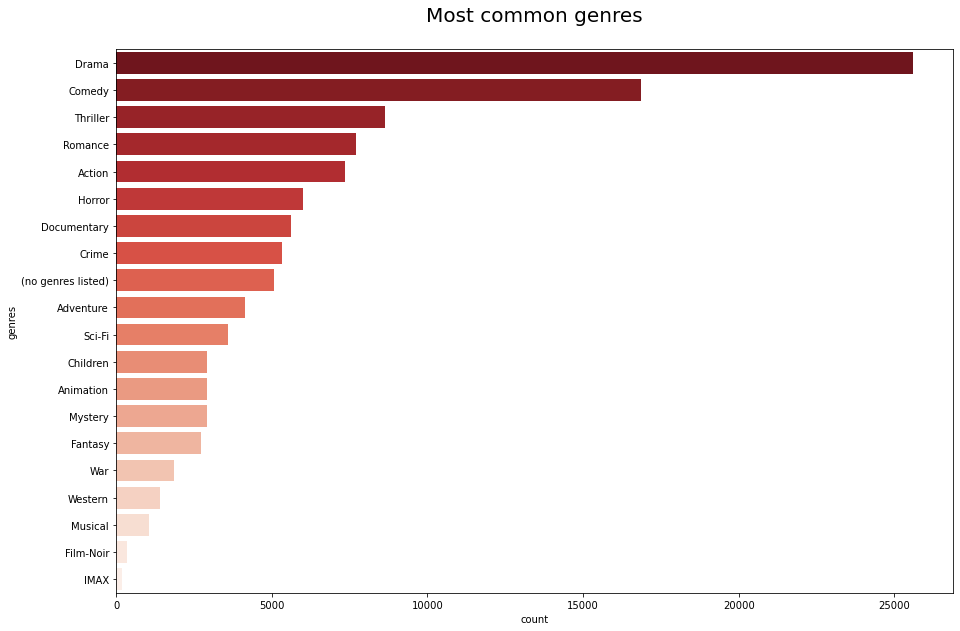

In [15]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

**Most Common Genres Findings:** The 3 most common genres are **"Drama"**, **"Comedy"** and **"Thriller"**

### Total number of movies released per year

In [16]:
# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)

In [17]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0

In [18]:
# Years distribution
x = pd.to_numeric(movies['year'], errors='coerce').value_counts()
x.index.astype('int64')

Int64Index([2015, 2016, 2014, 2017, 2013, 2018, 2012, 2011, 2009, 2010,
            ...
            1902, 1891, 1890, 1888, 1892, 1883, 1887, 1874, 1878, 1880],
           dtype='int64', length=135)

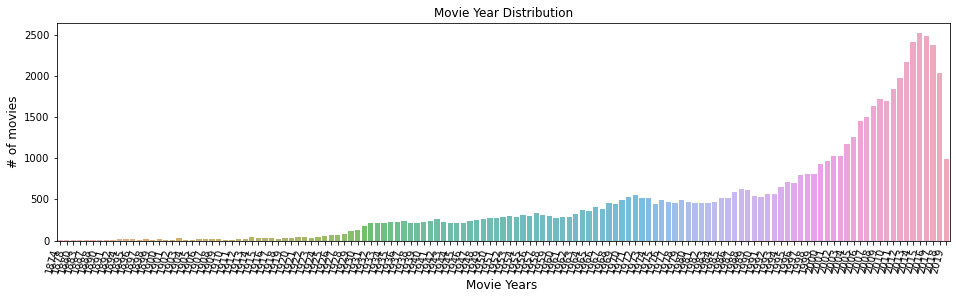

In [19]:
import matplotlib.ticker as mticker

x = pd.to_numeric(movies.year, errors='coerce').value_counts()
index = x.index.astype('int64')

#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(index, x.values, alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.title("Movie Year Distribution")
plt.ylabel('# of movies', fontsize=12)
plt.xlabel('Movie Years ', fontsize=12)

plt.show()

The graph show that the top 5 years where most of the movies were released are 2015, 2016, 2014, 2017 and 2013 respectively.

## 3.2 Tag Exploration

**The most common tags**

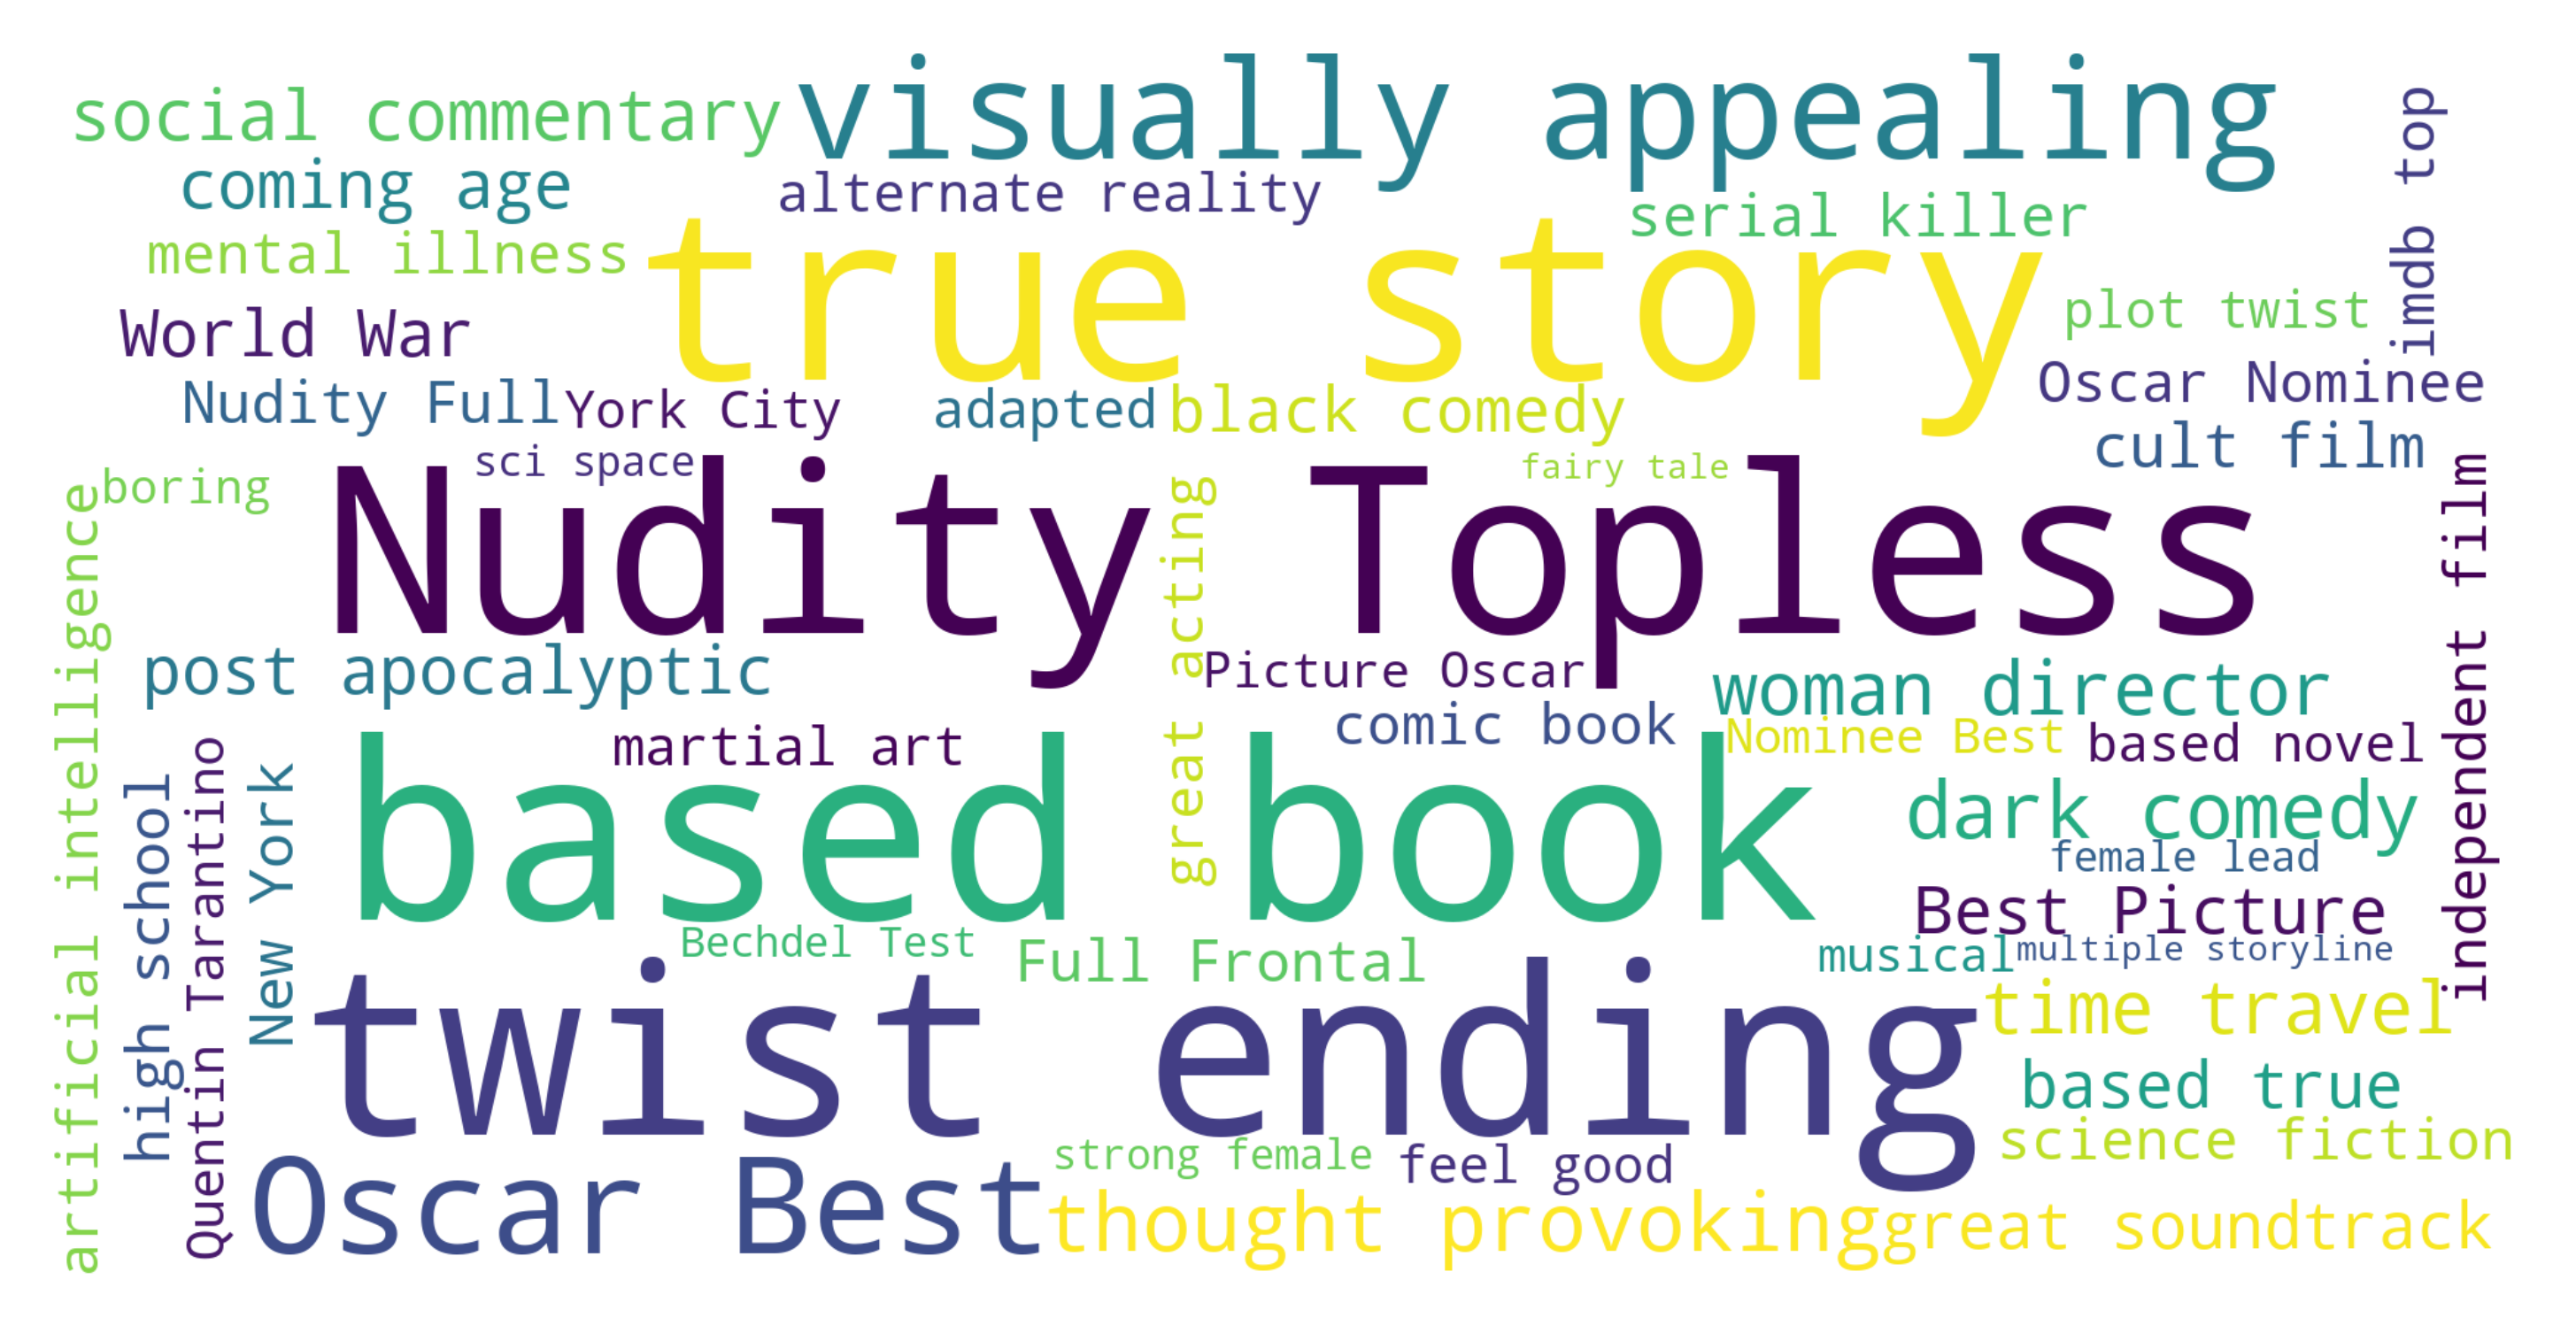

In [20]:

tags1 = tags.copy()
# Drop null values from tags column
tags1 = tags1['tag'].dropna()

# Join all the text in the list and remove apostrophes
all_tags = ' '.join([text for text in tags1.astype(str)])
#all_tags = all_tags.replace("'", "")

wordcloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=50).generate(all_tags)
plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud Finding:**  It is evident that tags such as **"Nudity"**,**"Topless"**, **"true story"**,**"twist ending"**, **"visual appealing"** and **"Oscar Best"** stands out from the word cloud. **"Nudity"**, **"visual appealing"** and **"Topless"** can be connected that the physical appearances of that actresses or actors is an important contributative factor to choosing a movie or rating it. **"true story"**,**"based book"**, **"twist ending"** are all indicative that consumers may be interested in factual based movies, movies that is based on books and also likes to be challenge cognitively on the bases of a "twist ending". 

### Most common tags by movieId

In [21]:
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

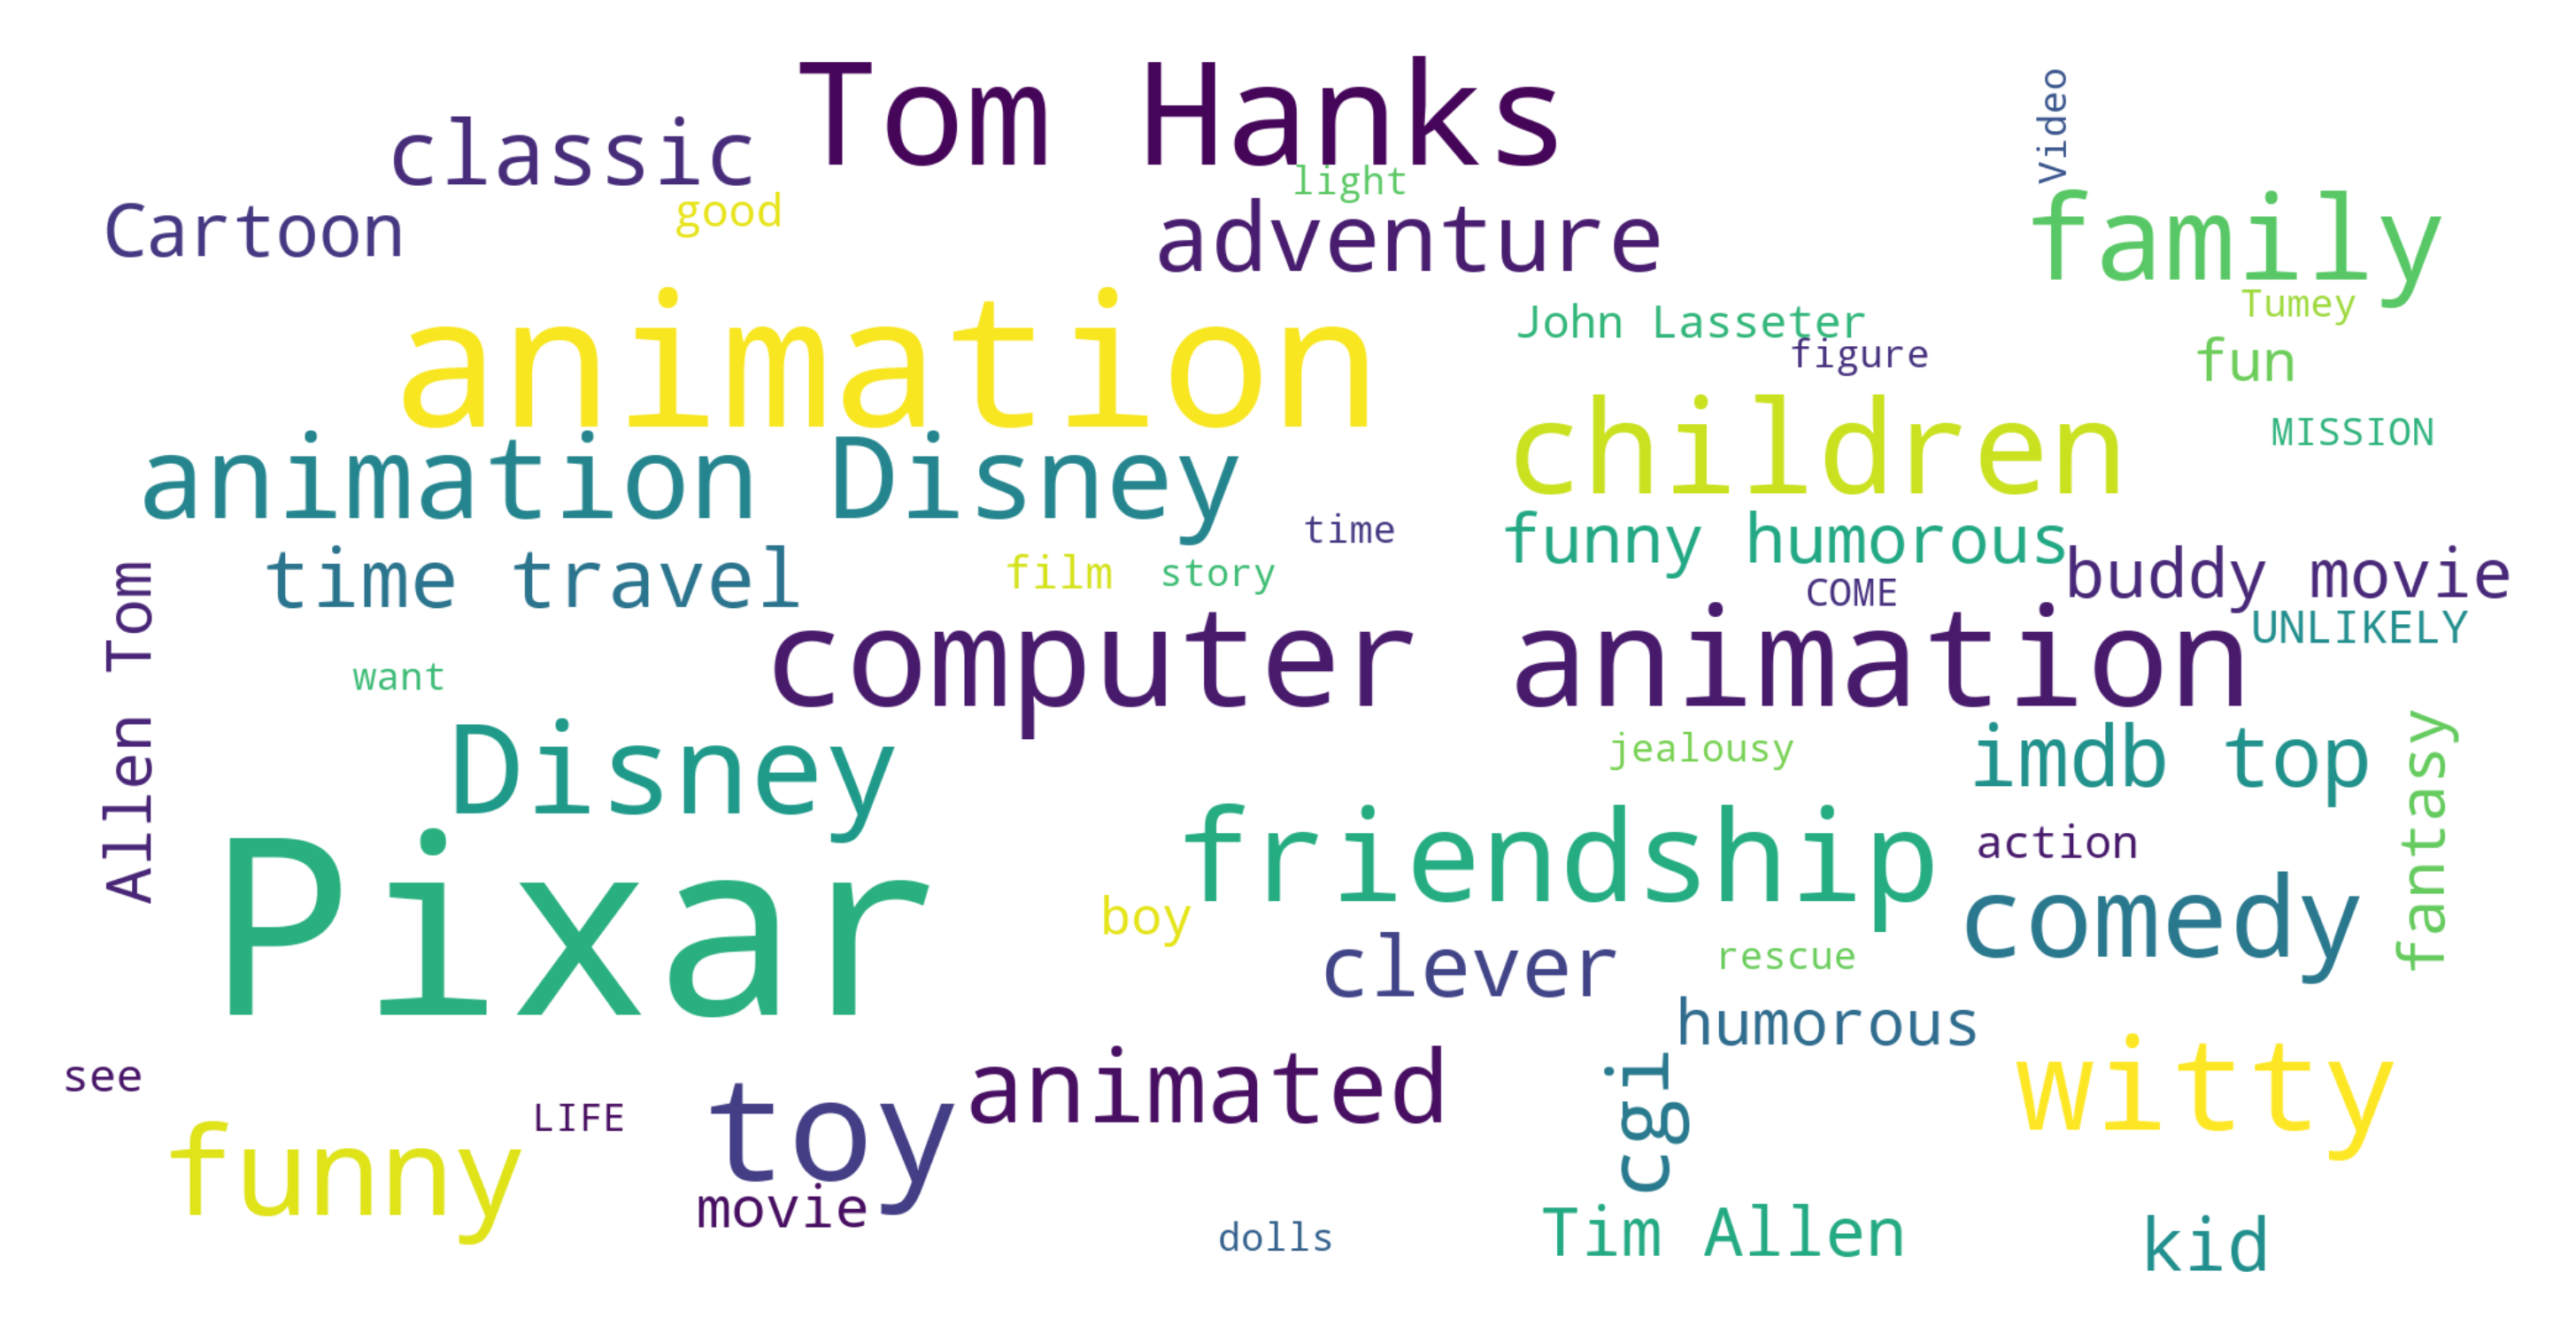

In [22]:
# Wordcloud for movieId==1
movieId1 = tags[tags['movieId']== 1].dropna()
text = " ".join(t for t in movieId1.tag)
wordcloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=50).generate(text)
plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Word Cloud Findings:** This is the word cloud for tags of movie_id 1. The top words used are **Tom Hanks**, **animation**, **computer animation**, **Pixar** and "**family**. This is an indication that the movie is possibly a family-friendly hence the use of **"animation"** in the tag and **Pixar** as it is an American computer animation company. **"Tom Hanks"** may be the leading actor in the movie hence his name is used in the tag. The wordcloud can be indicating that there is s strong correlation between the content of the movie and the tags.

### Most common tags by userId

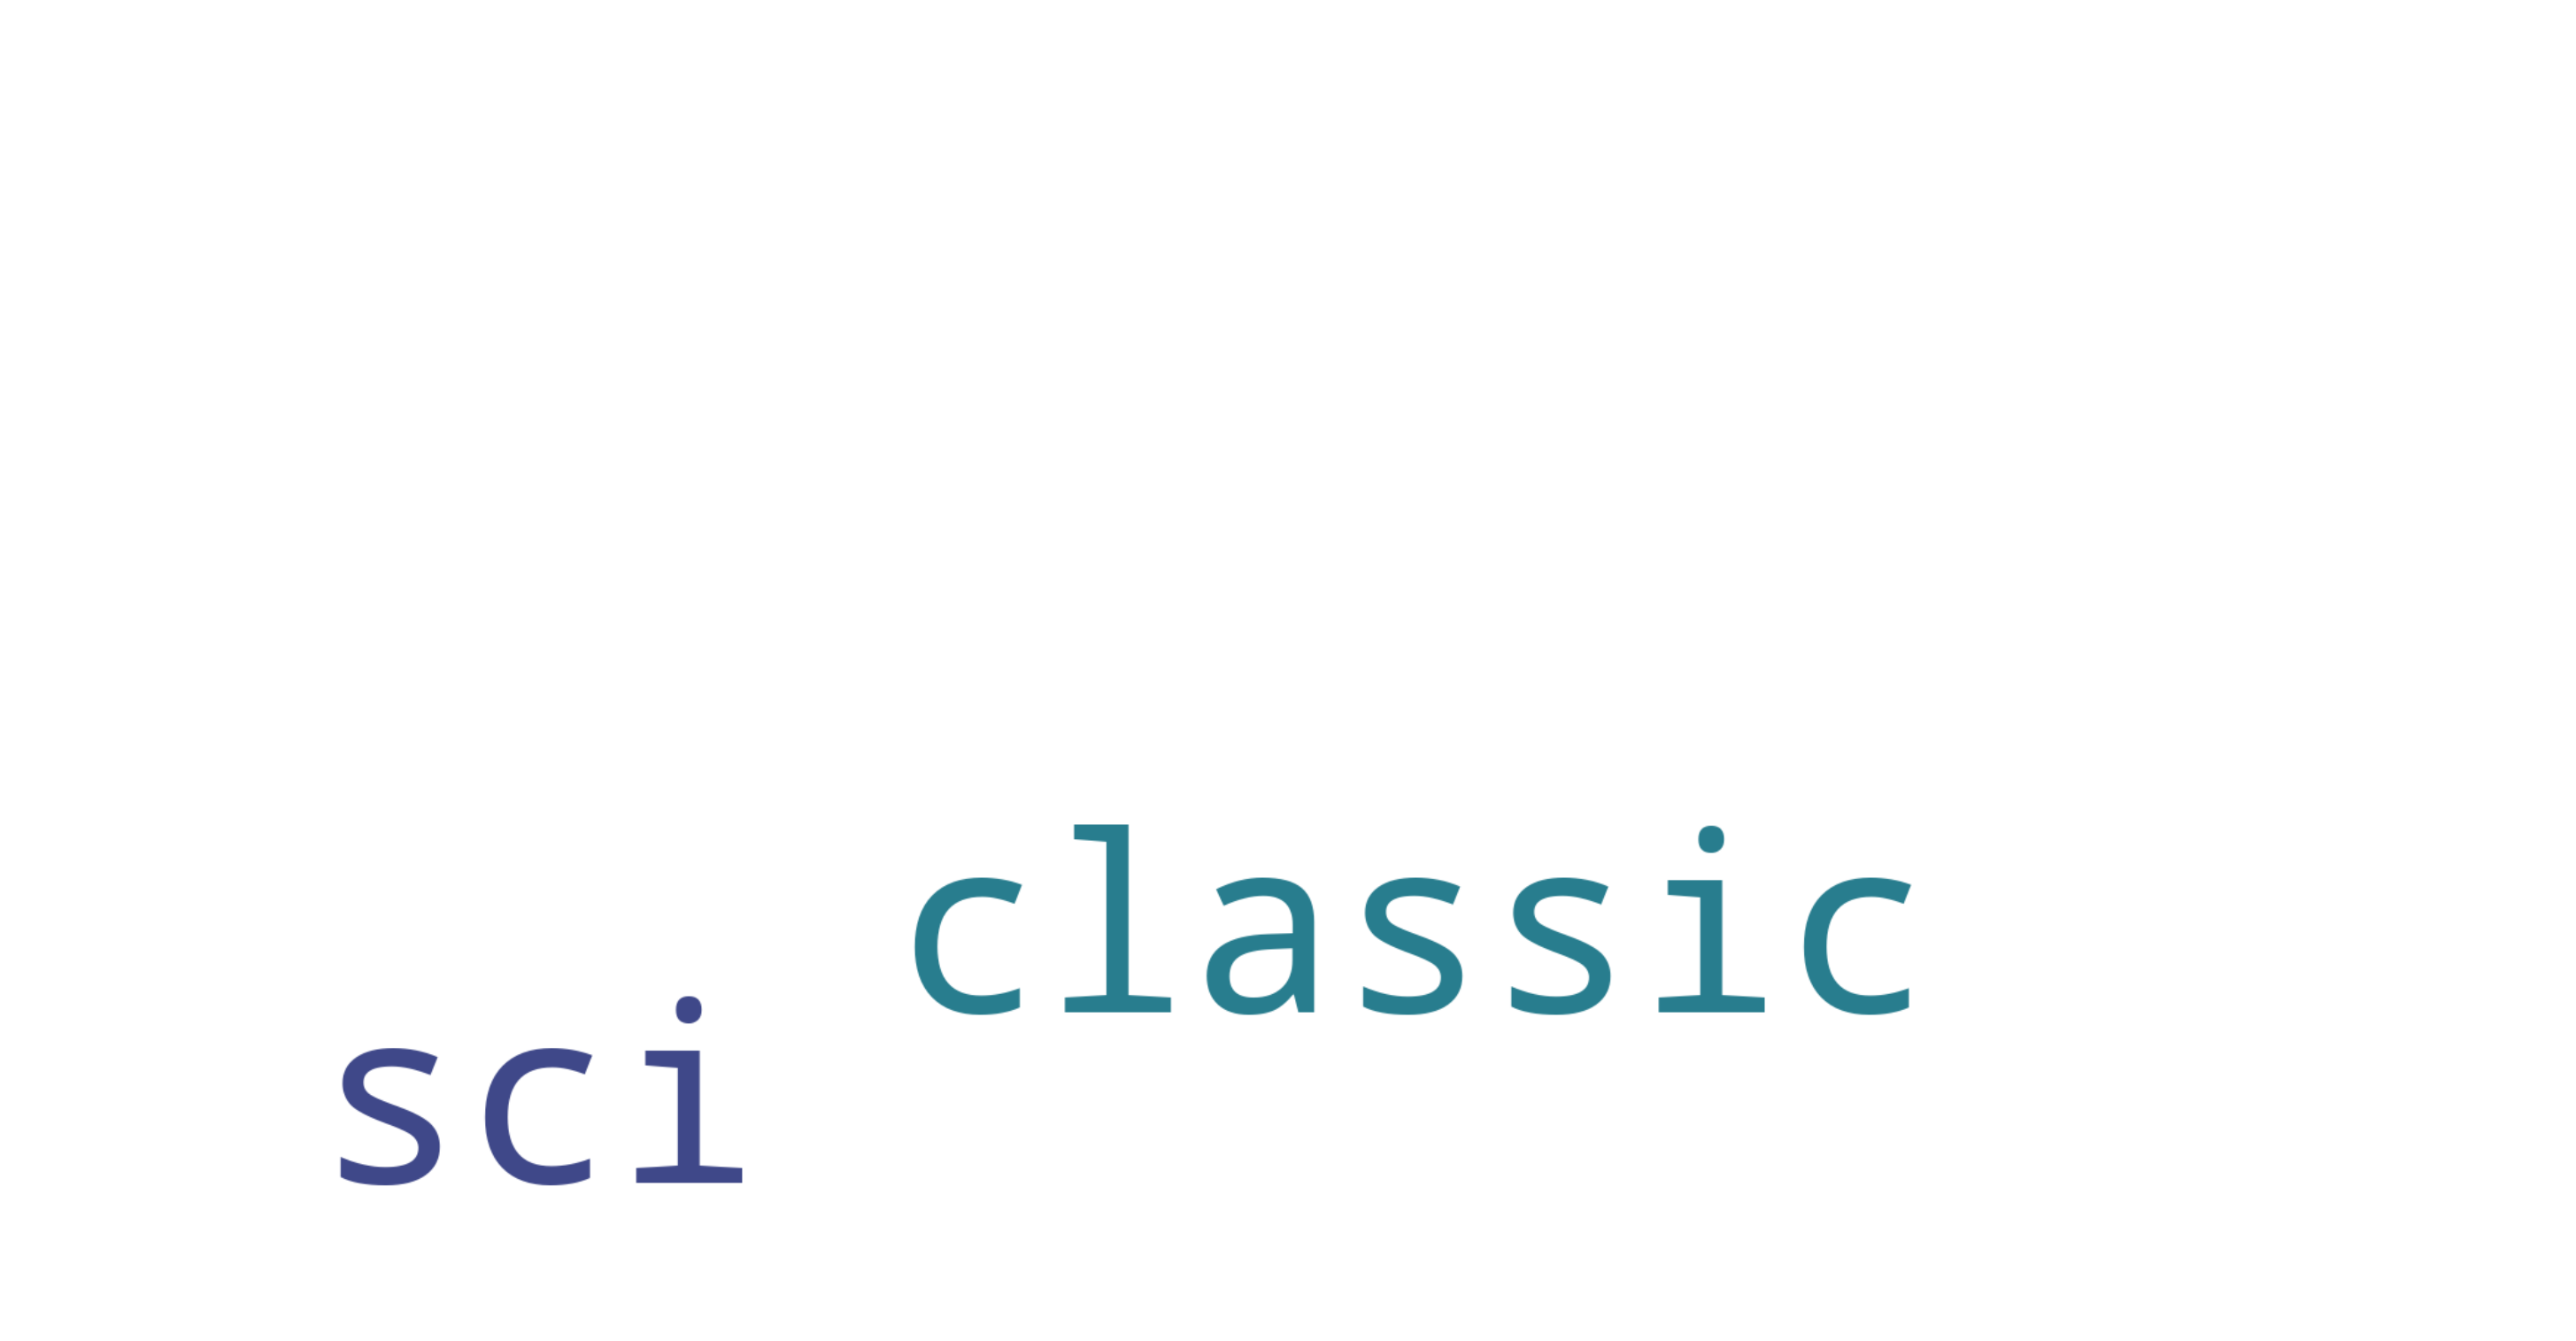

In [23]:
# Wordcloud for userId==3
userId1 = tags[tags['userId']==3].dropna()
text = " ".join(t for t in userId1.tag)
plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
wordcloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=70).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud Findings:** Using **userId 3** the words used in their tag is **sci** and **classic**. It indicates that this user watched or chooses movies based on genre. There is a correlation between the content of the movie, tag used and the movies the viewers watches. UserId can be swicthed to see their tag words as a word cloud. 

**The most common genome tags**

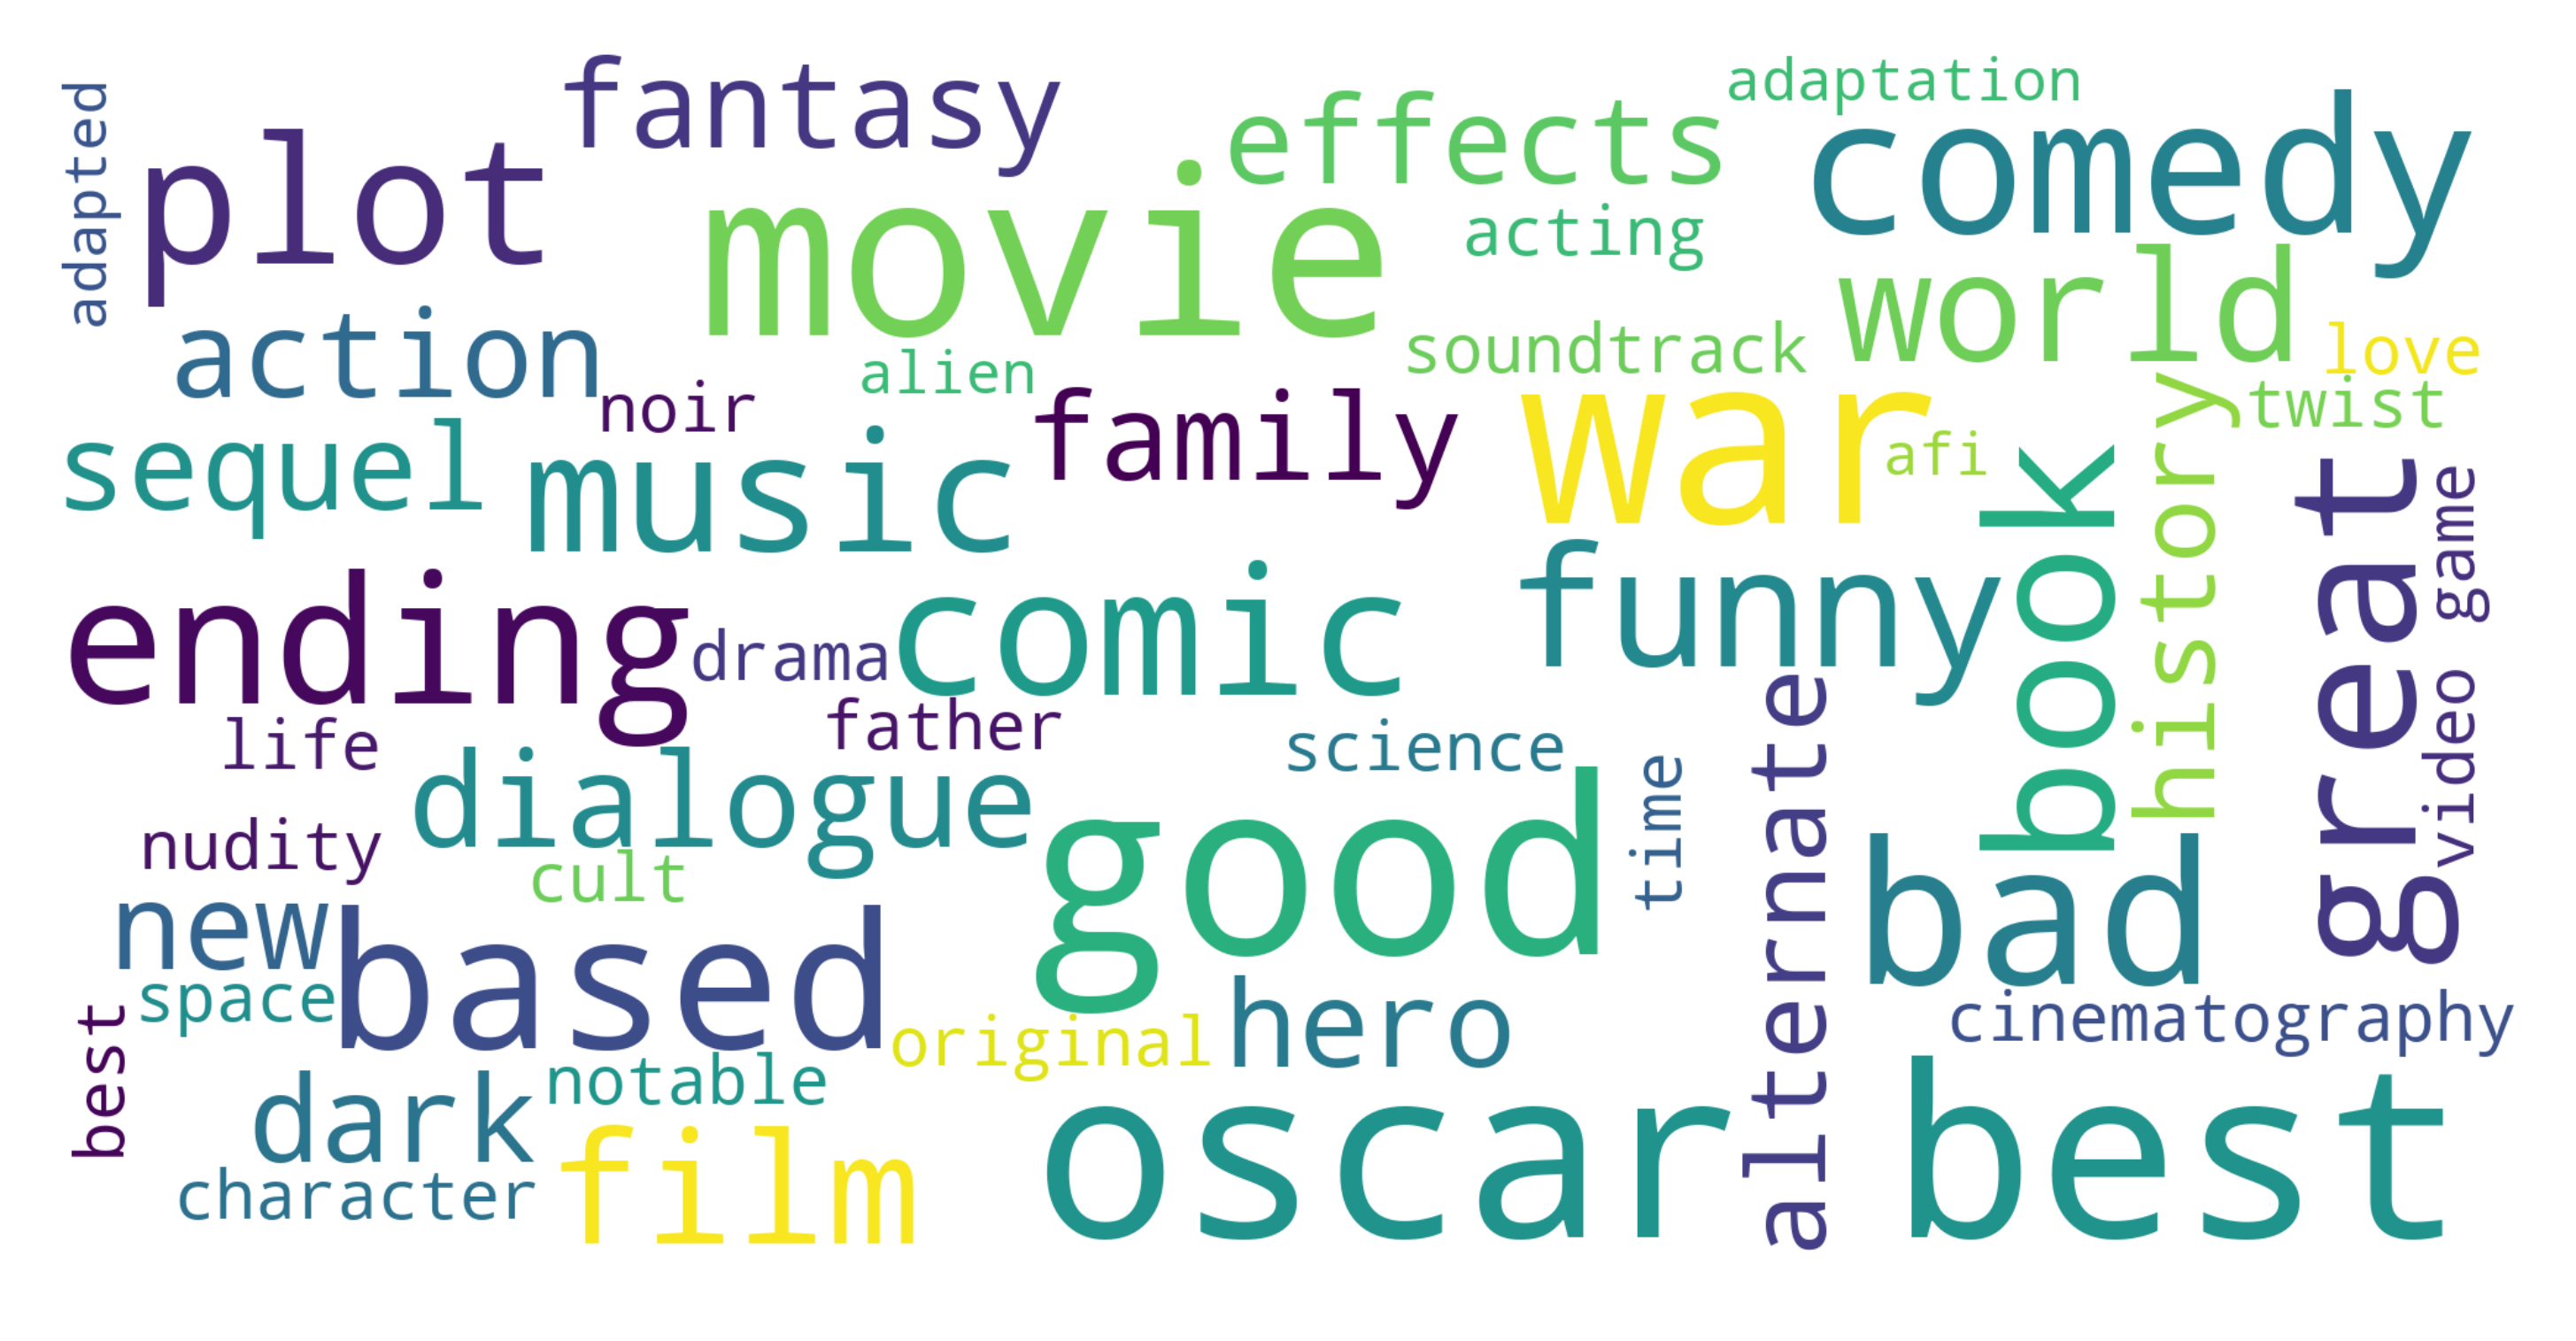

In [24]:
# Drop null values from genome_tags column
genome_tags1 = genome_tags['tag'].dropna()

# Join all the text in the list and remove apostrophes
all_gtags = ' '.join([text for text in genome_tags1.astype(str)])
all_gtags = all_gtags.replace("'", "")

wordcloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=50).generate(all_gtags)
plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud Finding:** According to the Genome tags Dataset word cloud, tag words such as **"movie"**, **"good"**,**"oscar best"**, **"comedy"**, **"plot"**,**"based"**, **"war"** are popular. All of the words are indicative that the synopsis of the movie is important. **"Oscar best"** may show that the viewers enjoy more award winning, pretigious movies.   

## 3.3 Train exploration(Ratings)

<h3>3.3.1 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [25]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",train.shape[0])
print("Total No of Users   :", len(np.unique(train.userId)))
print("Total No of movies  :", len(np.unique(train.movieId)))

Total data 
--------------------------------------------------

Total no of ratings : 10000038
Total No of Users   : 162541
Total No of movies  : 48213


In [26]:
st = default_timer()

# First time data load.
movies = pd.read_csv('edsa-movie-recommendation-challenge/movies.csv')
ratings = pd.read_csv('edsa-movie-recommendation-challenge/train.csv')

# Organise a bit and store into feather-format
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

print(ratings.dtypes)

# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]

# Categorize movies genres properly. Working later with +20MM rows of strings proved very resource consuming
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)

# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)
ratings.timestamp = ratings.timestamp.dt.year

# Check and clean NaN values
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)
    
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Number of movies Null values:  410
Number of ratings Null values:  0
Elapsed time(sec):  8.29


In [27]:
ratings.tail()

userId  movieId  rating  timestamp
10000033  145795   209145     1.0       1970
10000034  147040   209153     2.5       1970
10000035  115835   209159     3.0       1970
10000036  119571   209169     3.0       1970
10000037  119571   209171     3.0       1970

### 3.3.2. Movie rating distribution

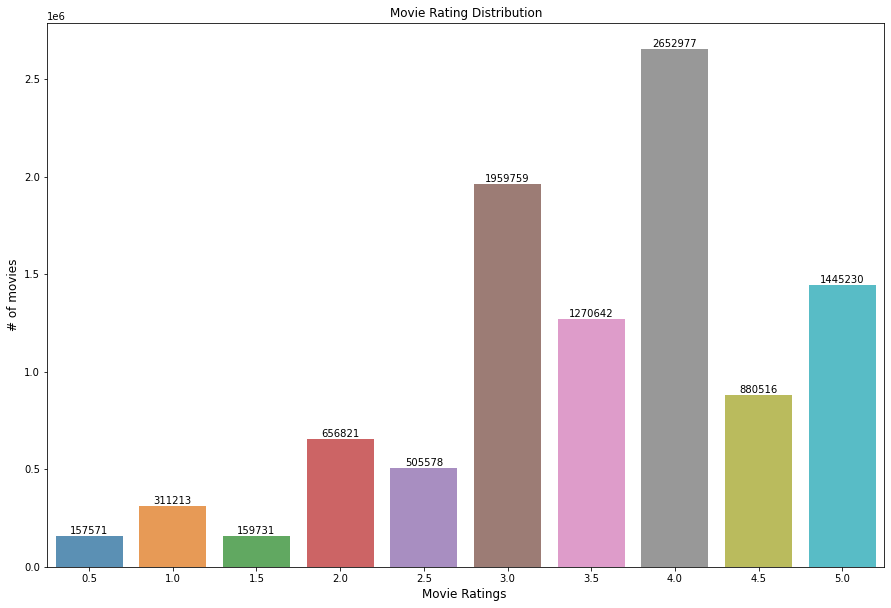

In [28]:
x=ratings['rating'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(15,10))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Movie Rating Distribution")
plt.ylabel('# of movies', fontsize=12)
plt.xlabel('Movie Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Looks a little bit messy, lets try rounding the ratings and fixing the y-axis

In [29]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

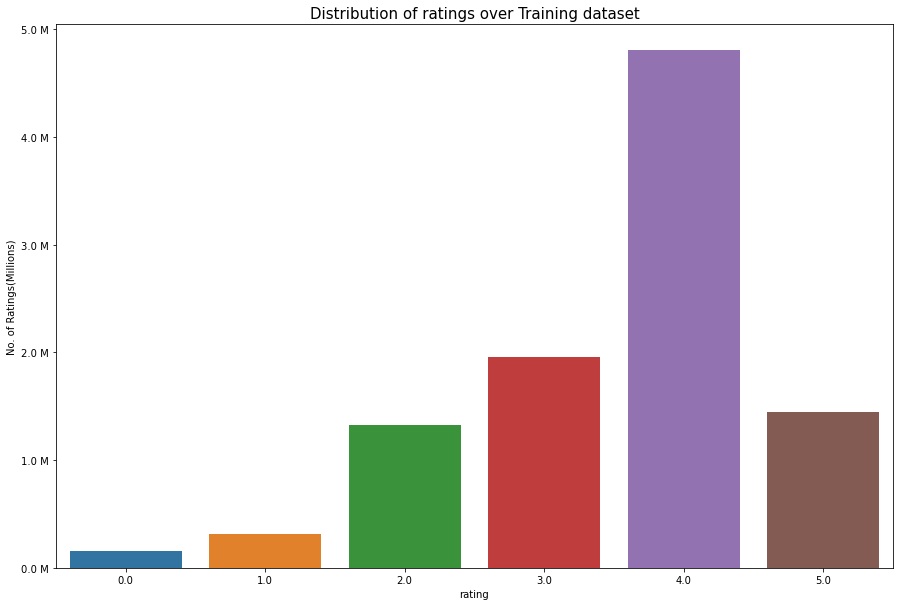

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(ratings.rating.round())
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

Looks clean now, It can be clearly seen that most of the movies had a rating of 4 followed by 3, then 5. The higher the bar, the more the ratings, and vice versa.

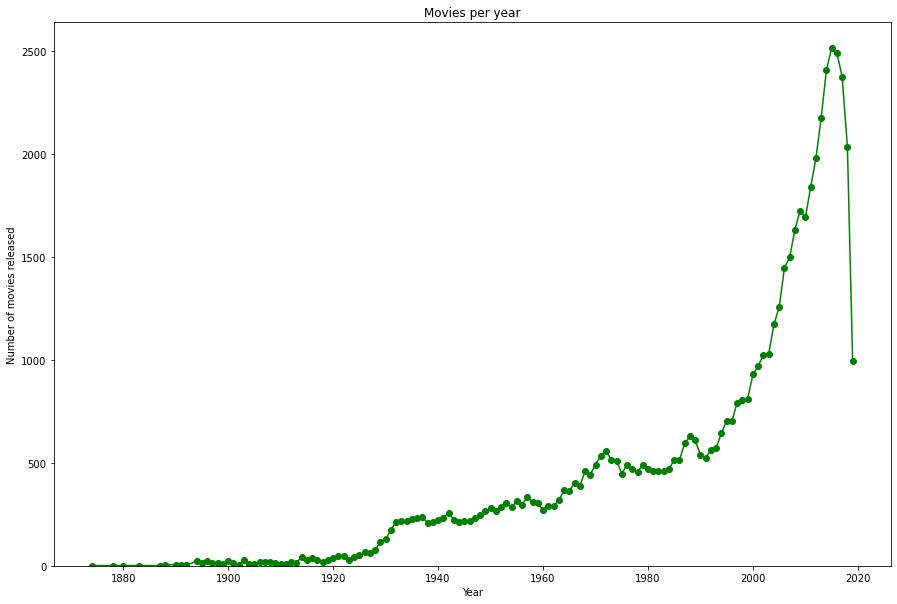

Elapsed time(sec):  0.12


In [31]:
st = default_timer()

# Let's work with a temp smaller slice 'dftmp' of the original dataframe to reduce runtime (ratings hass +2MM rows)
dftmp = movies[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')
plt.title('Movies per year')
plt.grid()
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^ax1$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))




**Graph intrepretation:** The information above indicates that there has been a rise in the production of movies as the years progresses. Before the 1800s to 1920 there was not a much production taking place. After the 1920s the release of movies are increasing in relationship with the number of ratings. There is an evident decrease from the late 2010 to 2020 movie releases in relationship to number of ratings. It can be indicative that major global events such as the COVID-19 pandemic plays a role in the number of releases of movies per year and the ratings as well. 




<Figure size 1080x360 with 0 Axes>

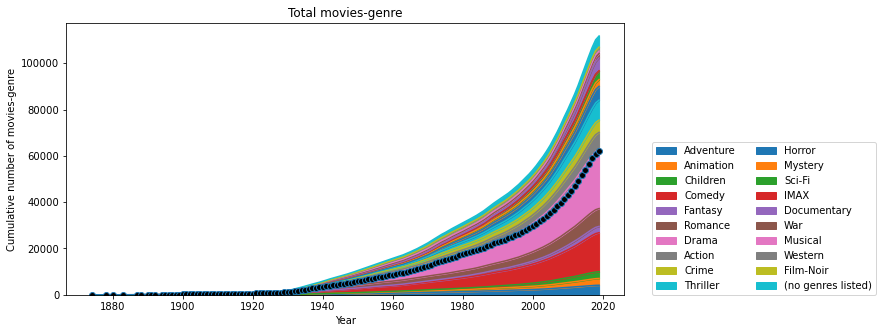

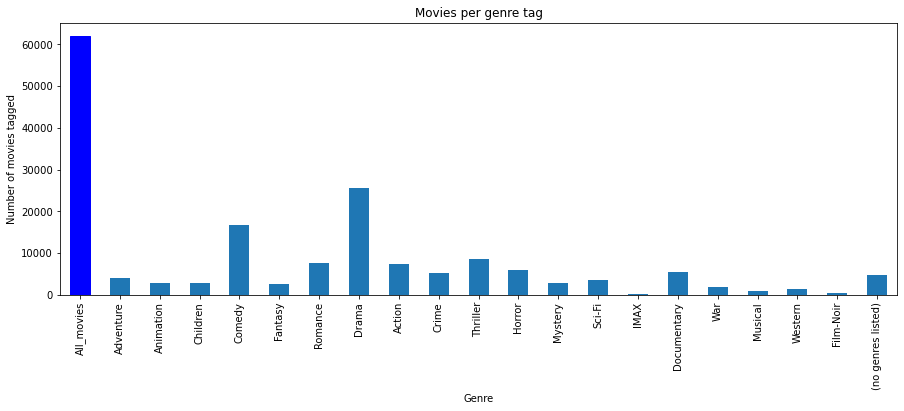

Elapsed time(sec):  0.41


In [32]:
st = default_timer()

plt.figure(figsize=(15,5))
dftmp = movies[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
# Plot histogram for each individual genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()
# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

# Housekeeping
%reset_selective -f (^barlist$|^dftmp$|^genre$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

**Findings:** It is evident the number of movies per genre started rapidly finding momemtum in growth by the 1940's. 

**Findings:** Just over 60000 movies are used in tags by genre. The top 3 movie genres in relation to tag are **Drama**, **Comedy** and **Thriller**. 

In [33]:
# comments here

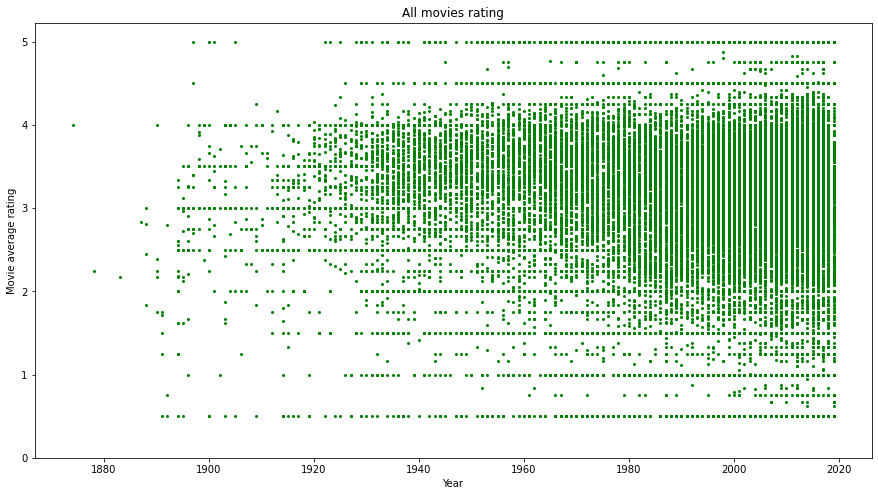

Elapsed time(sec):  0.39


In [34]:
st = default_timer()

dftmp = movies[['movieId', 'year']].set_index('movieId').join(
    ratings[['movieId','rating']].groupby('movieId').mean())

plt.figure(figsize=(15,8))
plt.plot(dftmp.year, dftmp.rating,"g.", markersize=4)
plt.xlabel('Year')
plt.ylabel('Movie average rating')
plt.title('All movies rating')
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

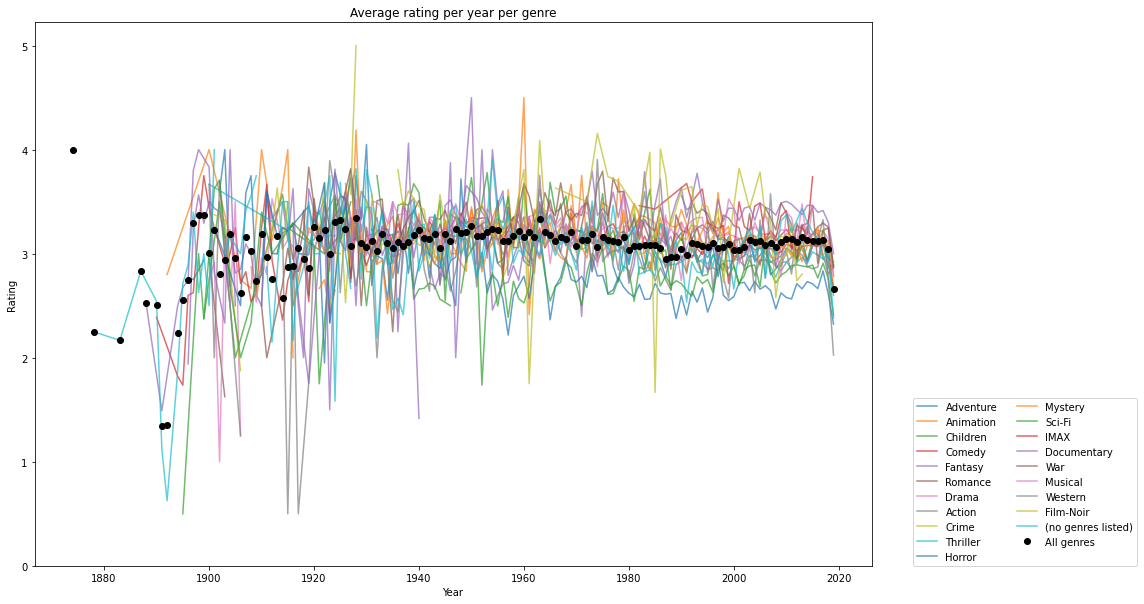

Elapsed time(sec):  5.54


In [35]:
st = default_timer()

plt.figure(figsize=(15,10))
# For each genre
for genre in genres_unique.genre:
    # Select only movies matching current genre. Pick only movieId (as index) and year.
    dftmp = movies[movies[genre]==True][['movieId', 'year']].set_index('movieId')
    # Selects ratings, with movieId as index. Select only movies that match also the previous step. Join both.
    dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                       .groupby('movieId').mean())
    # Now we have a df of movieId, year and multiple ratings. Group by year and compute the average rating.
    dftmp = dftmp.groupby('year').mean()
    plt.plot(dftmp, label = genre, alpha=0.7)

# For all genres
dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='black')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year per genre')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

**Average Rating per Year:** According to the information given from the 1920s onwards to late 2010s there has been a stable rating of all genres of greater than 2.5 and less then 4. It is also evident that there is a slight downfall in rating just before 2020. This notion can be related to the global pandemic affect of less movies being released meaning less movies to rate.  

In [36]:
#create a dataframe for analysis
ratings_trend = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
ratings_trend['total number of ratings'] = pd.DataFrame(ratings.groupby('movieId')['rating'].count()) 
ratings_trend.head(10)

rating  total number of ratings
movieId                                   
1        3.889971                    23062
2        3.263414                     9654
3        3.132325                     4727
4        2.878099                      968
5        3.059165                     4648
6        3.857906                     9828
7        3.381459                     4838
8        3.052209                      498
9        3.010533                     1519
10       3.414240                    11369

In [37]:
no_of_rated_movies_per_user = train.groupby(by='userId')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
Name: rating, dtype: int64

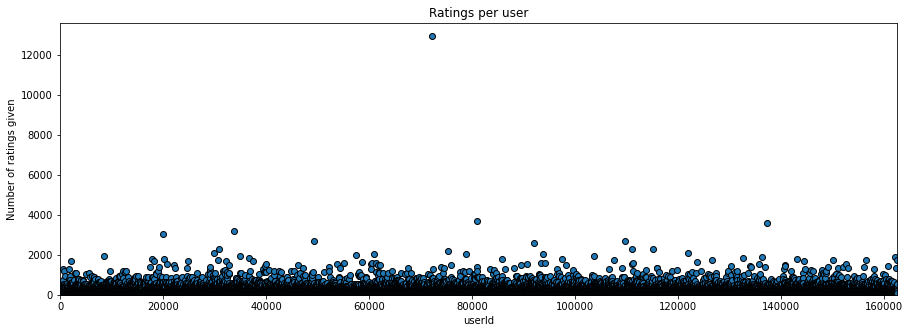

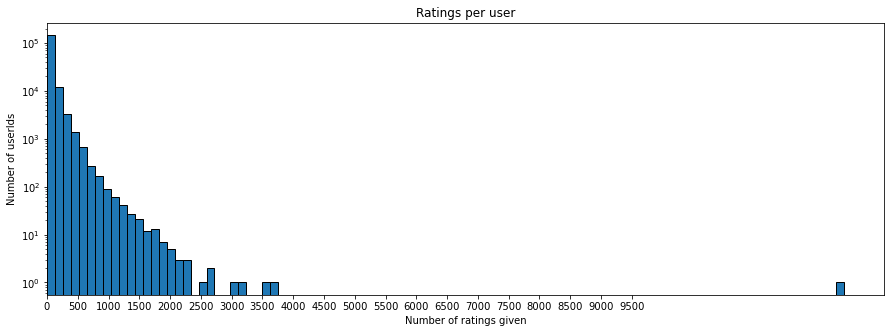

Elapsed time(sec):  1.2


In [38]:
st = default_timer()

# Scatter plot of all users and individual ratings count.
dftmp = ratings[['userId', 'movieId']].groupby('userId').count()
dftmp.columns=['num_ratings']
plt.figure(figsize=(15,5))
plt.scatter(dftmp.index, dftmp.num_ratings, edgecolor='black')
plt.xlim(0,len(dftmp.index))
plt.ylim(0,)
plt.title('Ratings per user')
plt.xlabel('userId')
plt.ylabel('Number of ratings given')
plt.show()

# Histogram of ratings counts.
plt.figure(figsize=(15,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of userIds')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,500))
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

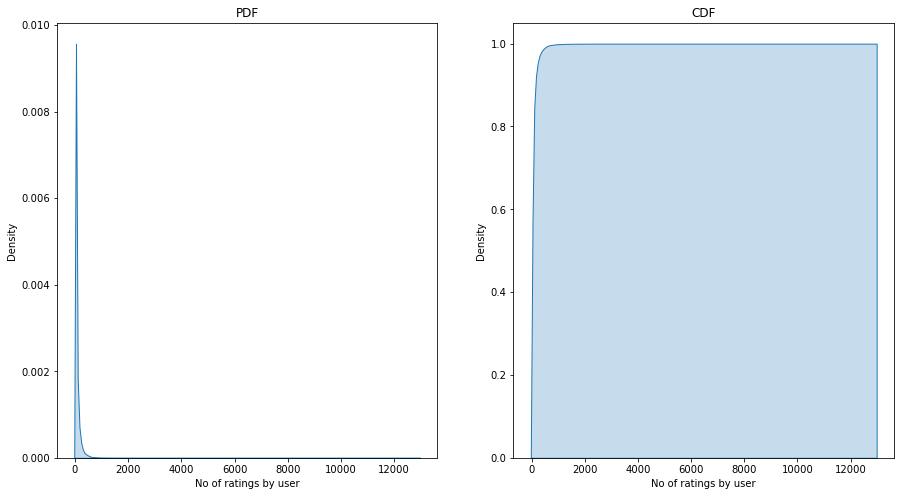

In [39]:
fig = plt.figure(figsize=(15, 8))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

## 3.4 imdb Dataset

In [40]:
imdb.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [41]:
# Check and clean NaN values
print ("Number of imdb Null values: ", max(imdb.isnull().sum()))
imdb.dropna(inplace=True)

Number of imdb Null values:  19372


In [42]:
imdb.describe()

movieId      runtime
count    6963.000000  6963.000000
mean    51770.725262   105.454258
std     42637.751274    26.958271
min         1.000000     6.000000
25%      5383.500000    92.000000
50%     53375.000000   101.000000
75%     91332.000000   114.000000
max    131256.000000   877.000000

From the above table, it can be seen that movieId there are 27278 number of movies and the maximum runtime for all the movies is 877 minutes. The table also show that the average movie runtime is 105 minutes

### Runtime exploration

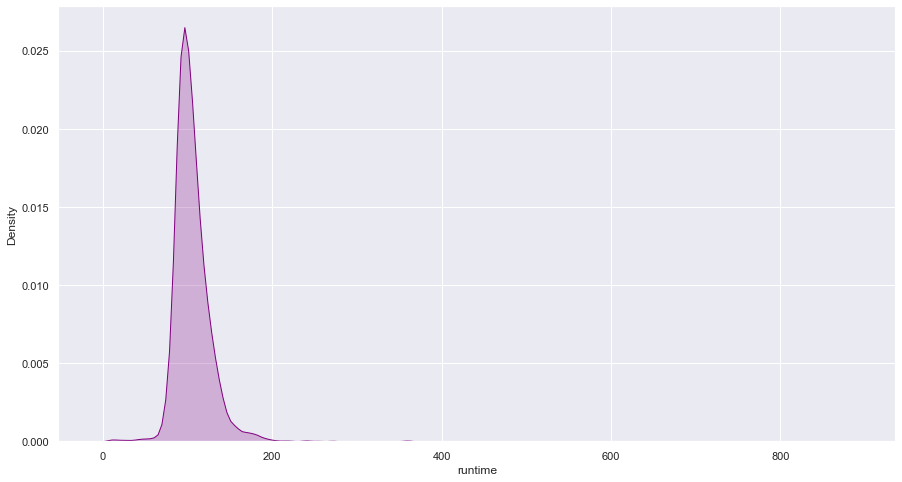

In [43]:
#Plot the Runtime
plt.figure(figsize=(15,8))
sns.set(style="darkgrid", )
sns.kdeplot(data=imdb['runtime'], shade=True, color='purple')

The distribution graph shows that the **runtime** for all the movies is more like **normally distributed** with the **mean of 105**

### Popular keywords

In [44]:
# Create dataframe containing only the movieId and keywords
imdb_keywords = pd.DataFrame(imdb[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
imdb_keywords.plot_keywords = imdb_keywords.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
imdb_keywords = pd.DataFrame([(tup.movieId, d) for tup in imdb_keywords.itertuples() for d in tup.plot_keywords],
                             columns=['movieId', 'plot_keywords'])

imdb_keywords.head()

movieId  plot_keywords
0        1            toy
1        1        rivalry
2        1         cowboy
3        1  cgi animation
4        2     board game

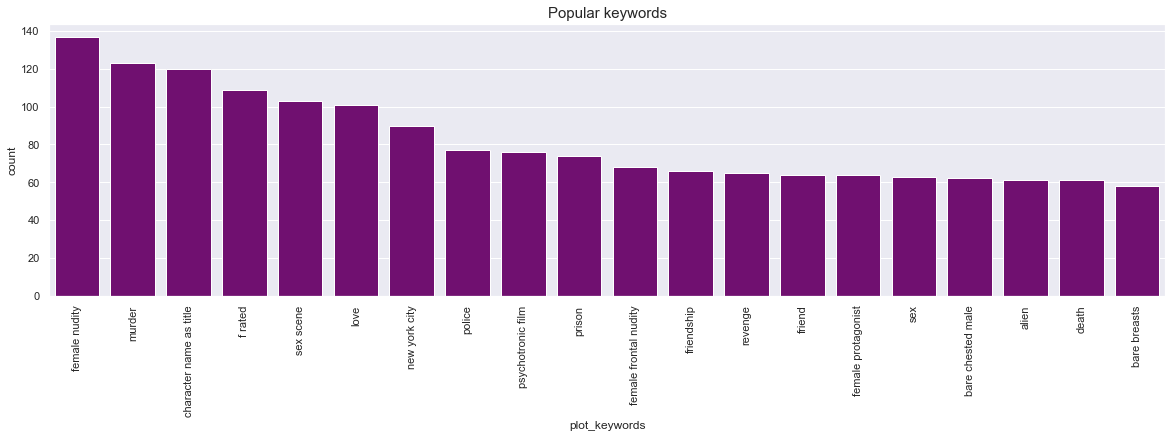

In [45]:
# Plot popular keywords
plt.figure(figsize = (20,5))
keyword=imdb_keywords['plot_keywords'].explode()
ax=sns.countplot(x=keyword, order = keyword.value_counts().index[:20],color='purple')
ax.set_title('Popular keywords',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The imdb dataset show the top 5 most popular plot keywords as **1.female nudity, 2. murder, 3. character name as title, 4. f rated and 5. sex scene** , which implies most of the people are searching those words which searching for movies to watch.

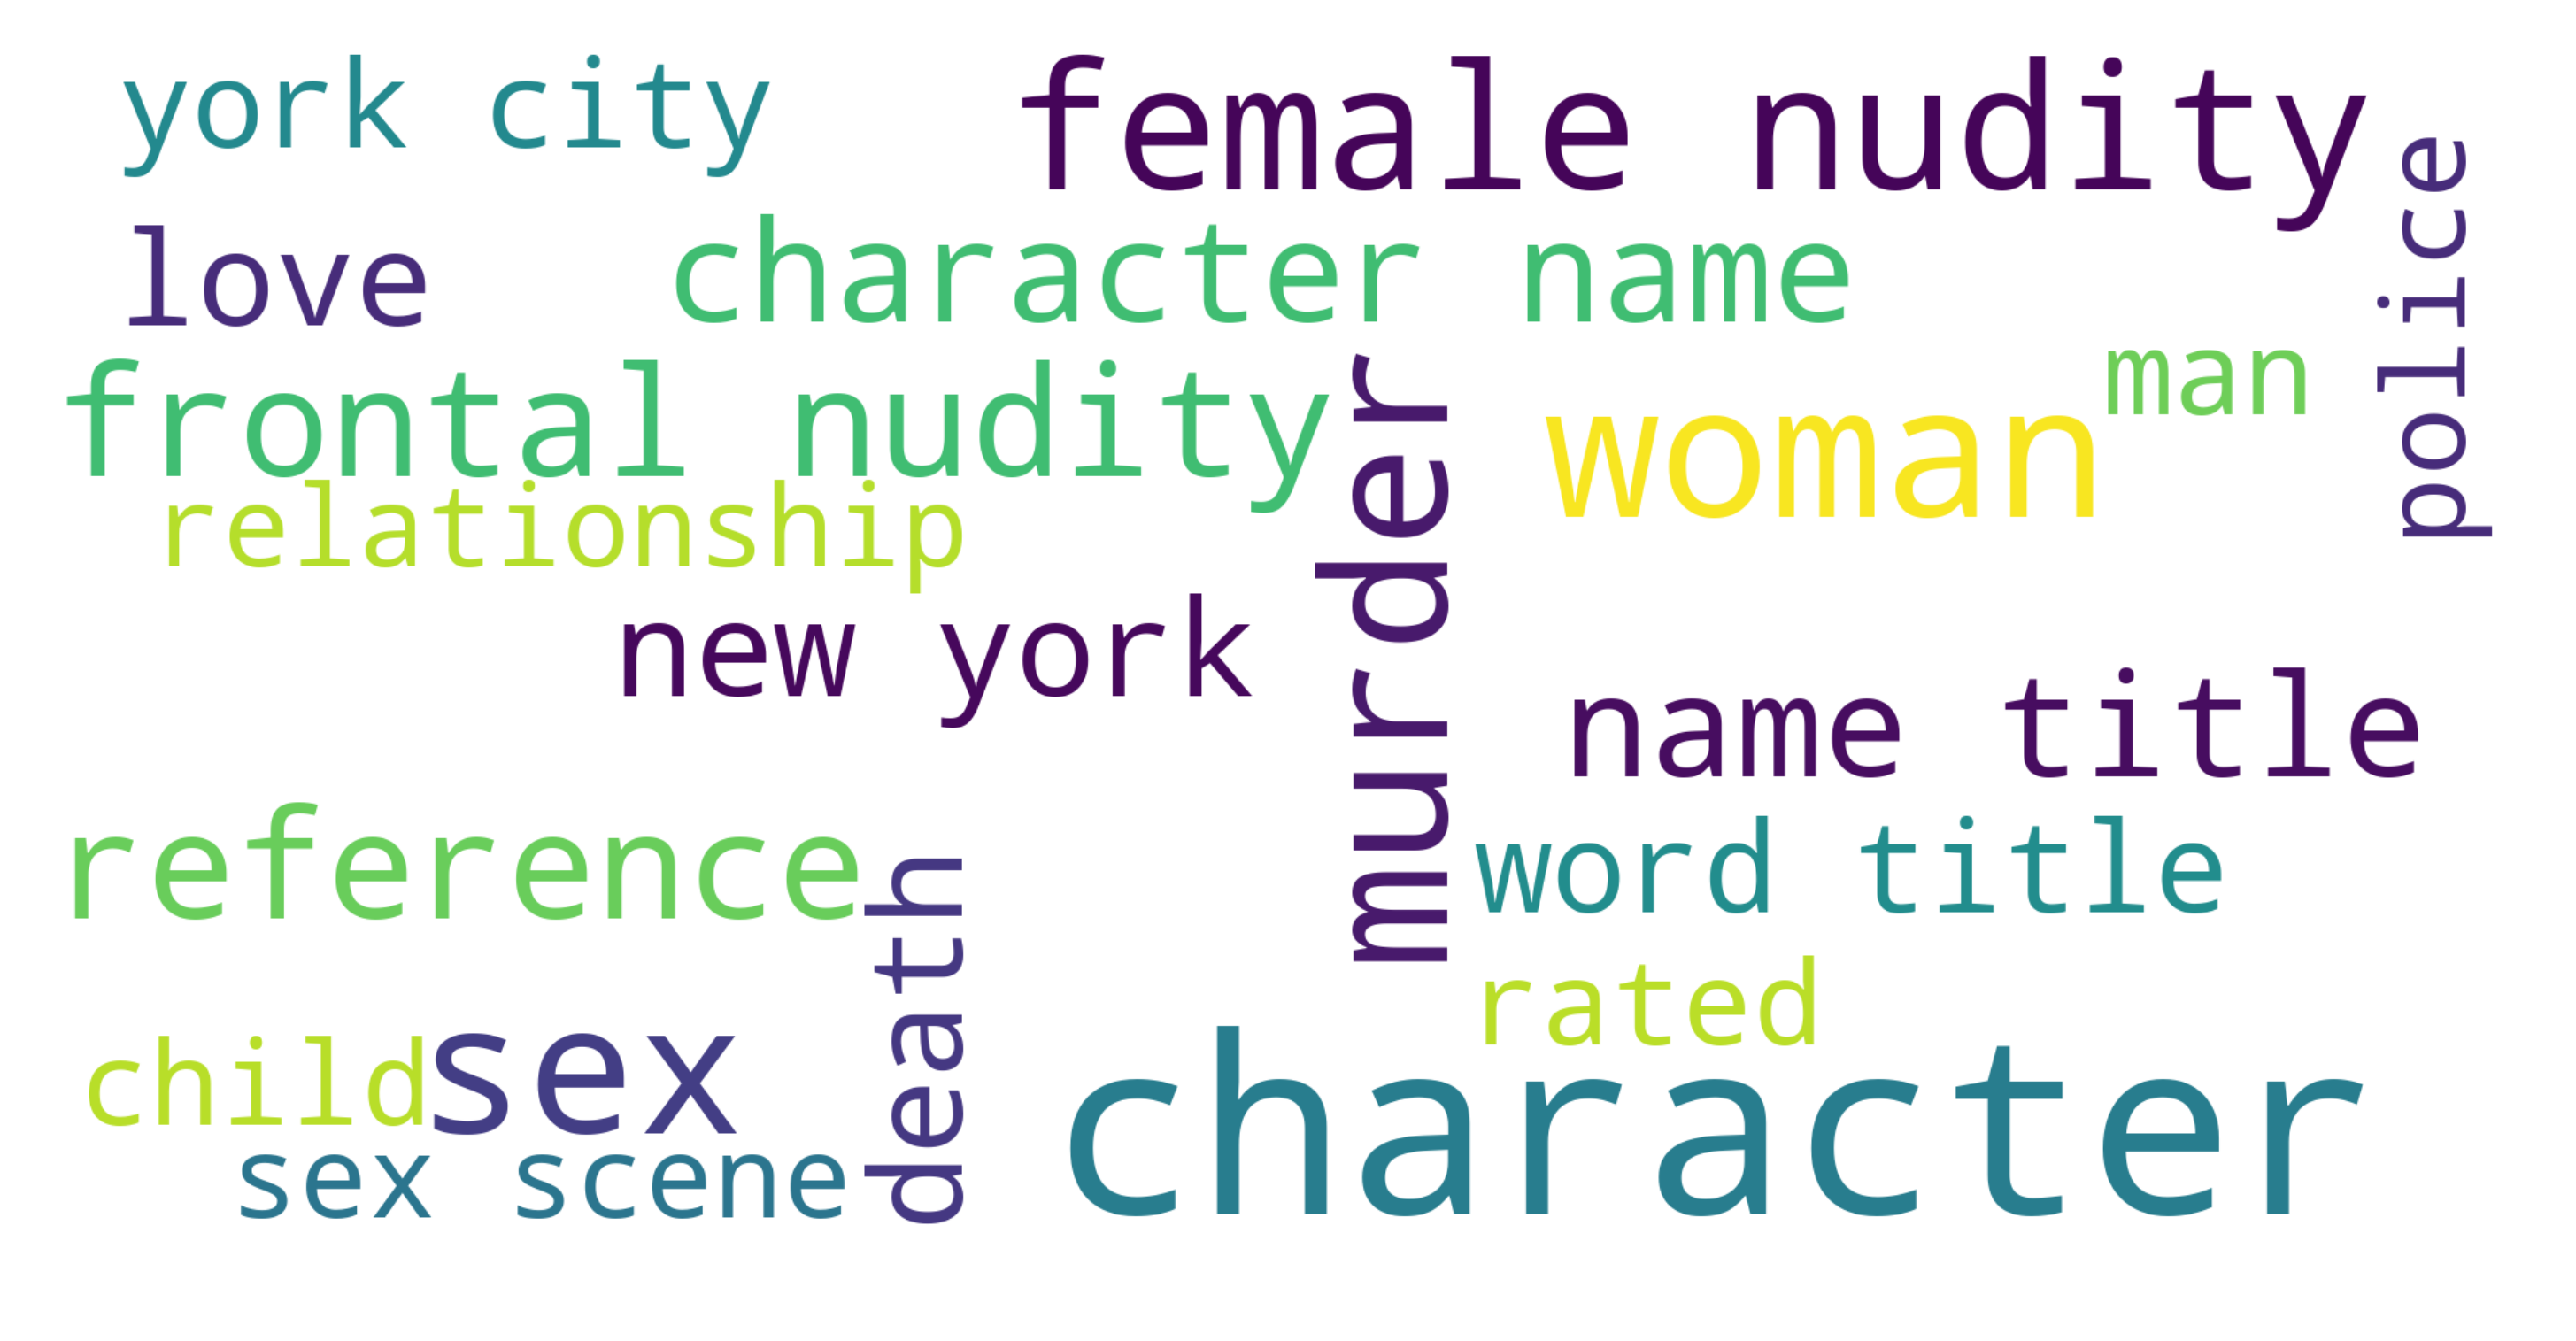

In [46]:
# Drop null values from imdb_keywords plot_keywords column
imdb_keywords = imdb_keywords['plot_keywords'].copy()

# Join all the text in the list and remove apostrophes
all_gtags = ' '.join([text for text in imdb_keywords.astype(str)])
all_gtags = all_gtags.replace("'", "")

wordcloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=20).generate(all_gtags)
plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud Findings:** In the wordcloud words such as **character**, **female nudity**, **murder**, **woman** are of the popular keywords that is being used when searching for movies. It can be indicative that viewers are more interested in the character in the movie when deciding on a movie and also that phyical appearance are important as **"nudity** are co-mentioned in some of the keywords. There may be a correlation between males and words that has been searched are related to female attributes. 

### Popular casts

In [47]:
# Create dataframe containing only the movieId and title_casts
imdb_casts = pd.DataFrame(imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_casts seperated by "|" and create a list containing the title_cast allocated to each movie
imdb_casts.title_cast = imdb_casts.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-title_cast combination is in a seperate row
imdb_casts = pd.DataFrame([(tup.movieId, d) for tup in imdb_casts.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])

imdb_casts.head()

movieId     title_cast
0        1      Tom Hanks
1        1      Tim Allen
2        1    Don Rickles
3        1     Jim Varney
4        1  Wallace Shawn

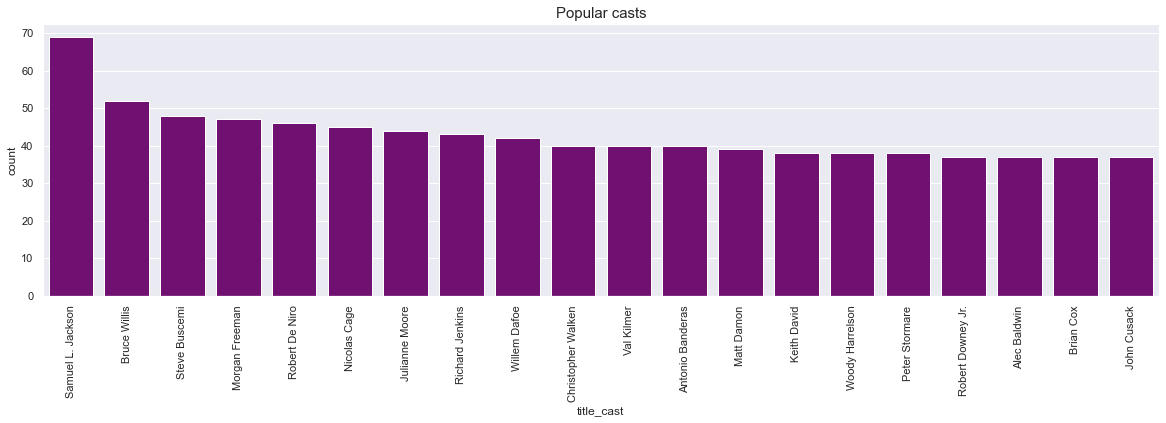

In [48]:
# Plot popular casts
plt.figure(figsize = (20,5))
casts=imdb_casts['title_cast'].explode()
ax=sns.countplot(x=casts, order = casts.value_counts().index[:20],color='purple')
ax.set_title('Popular casts',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The bar graph above show the most popular casts in the imdb dataset, in which we have **Samuel L. Jackson** as number 1 with about 70 movies followed by **Bruce Willis** with bout 50 movies. Which makes a lot of sense since these guys have been in the game for such a long time.

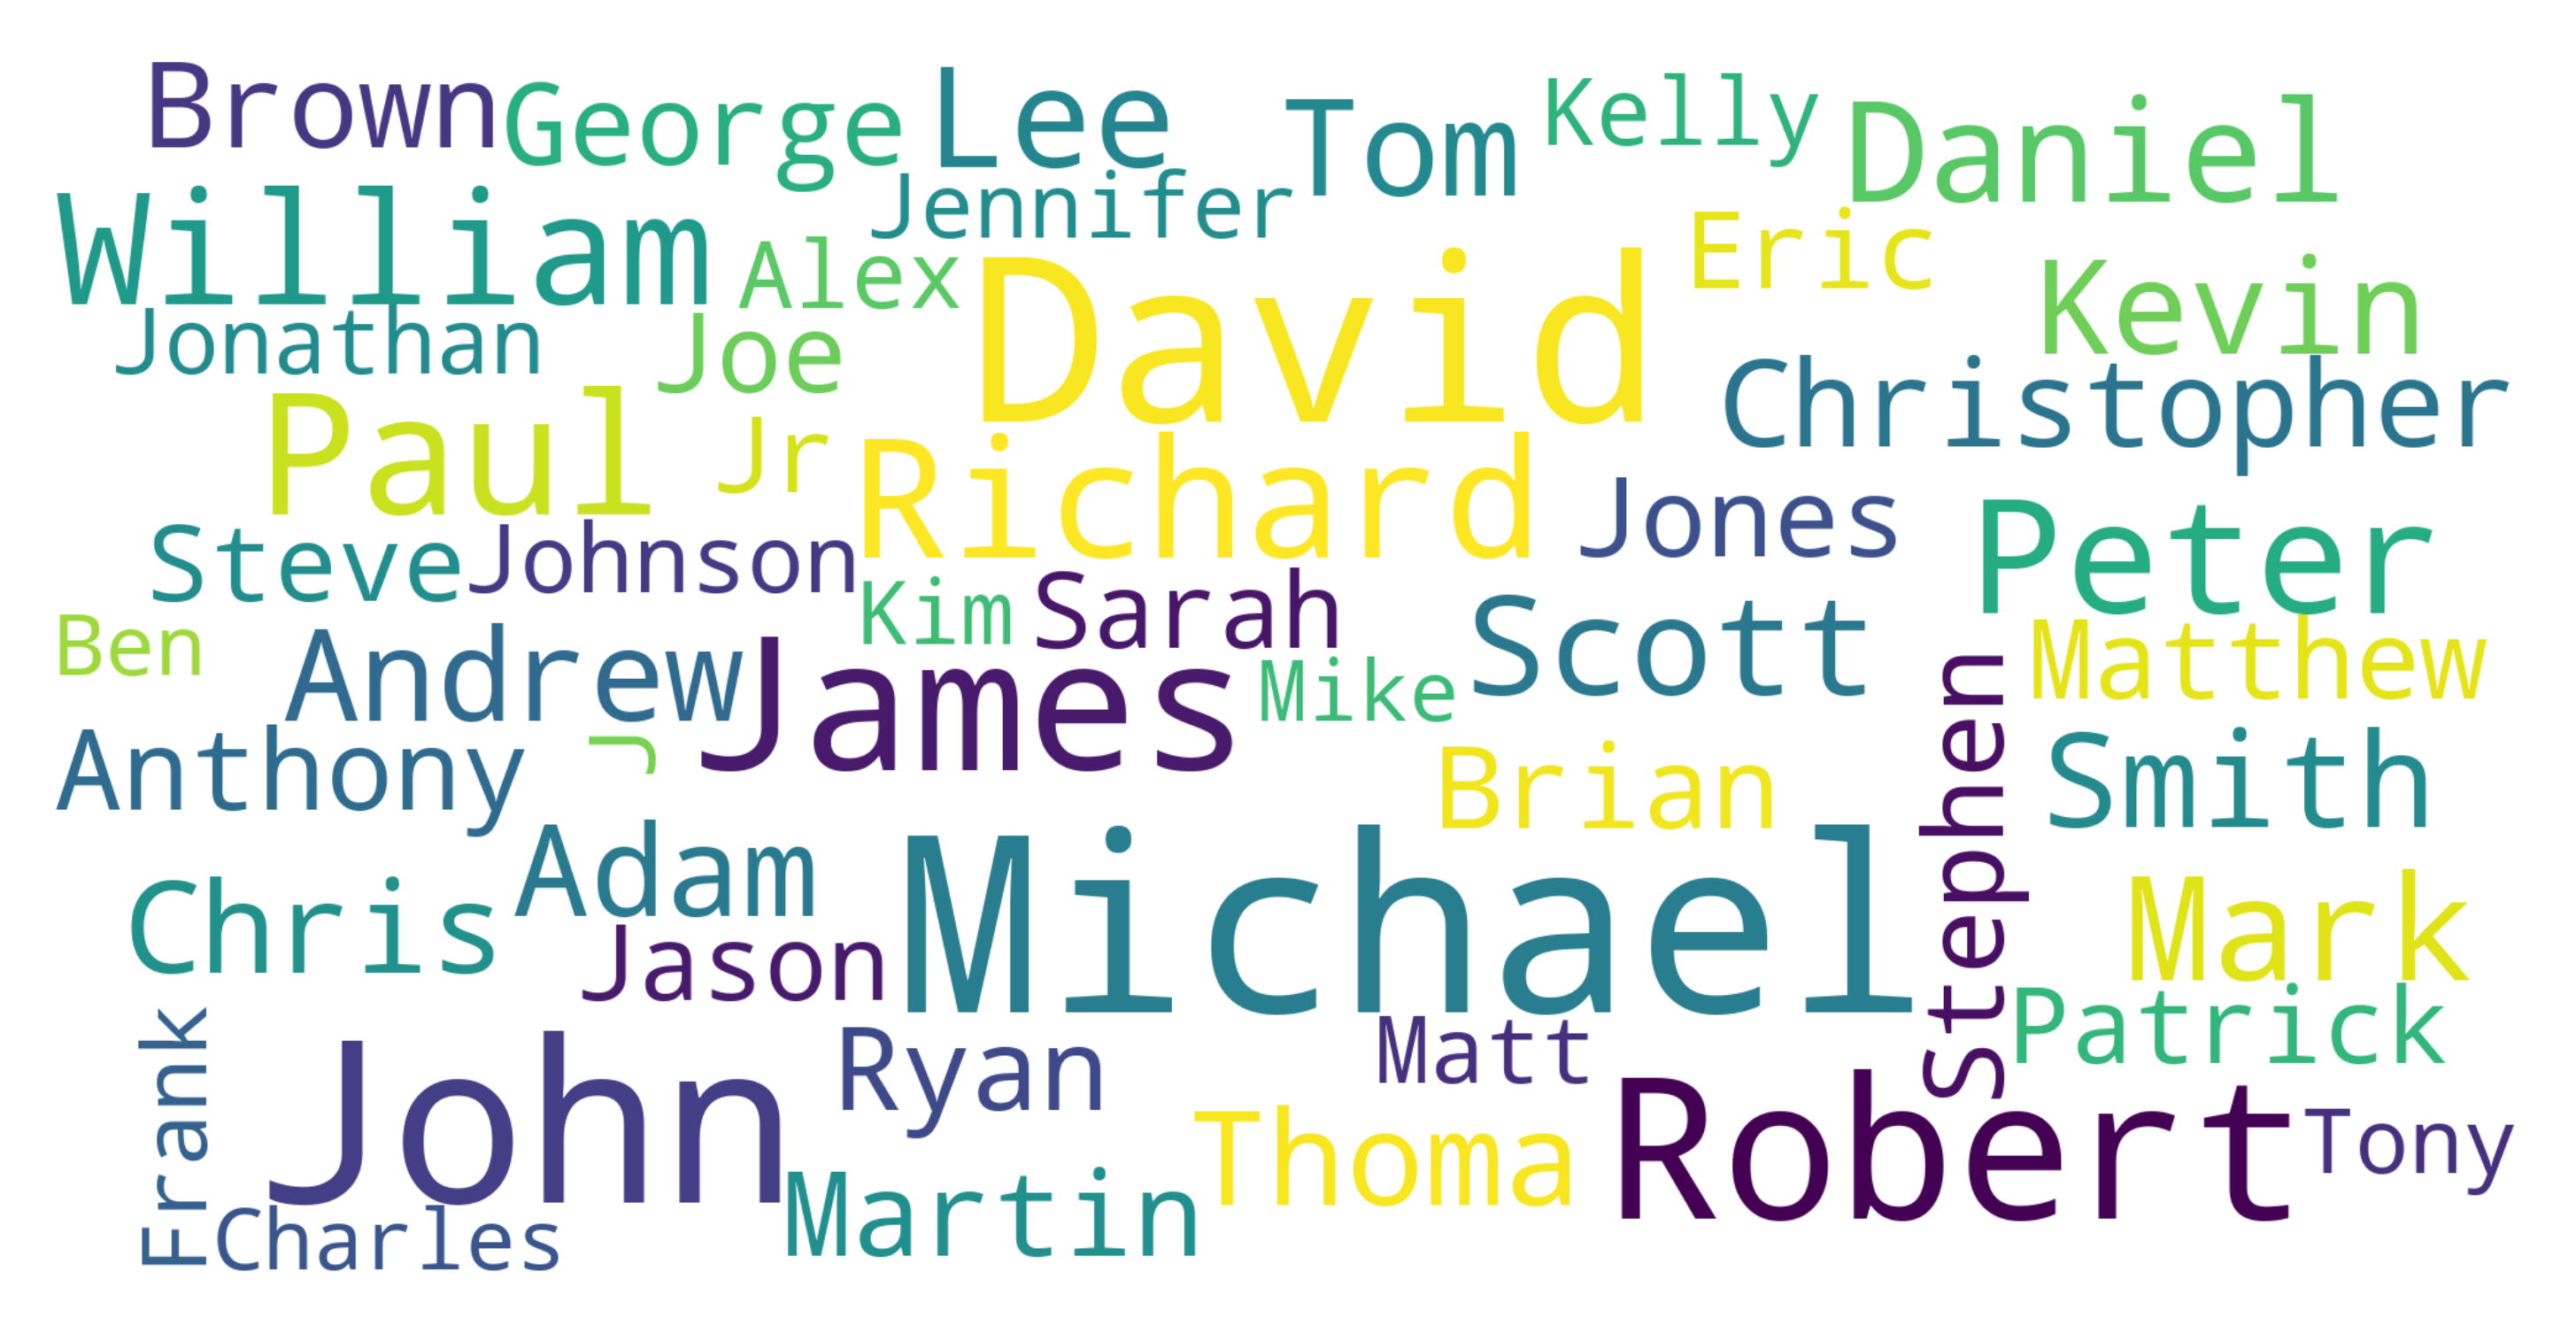

In [49]:
# Copy imdb_casts title_cast column
imdb_casts = imdb_casts['title_cast'].copy()

# Join all the text in the list and remove apostrophes
imdb_casts = ' '.join([text for text in imdb_casts.astype(str)])
imdb_casts = imdb_casts.replace("'", "")

wordcloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=1, max_words=50).generate(imdb_casts)
plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Top 20 directors

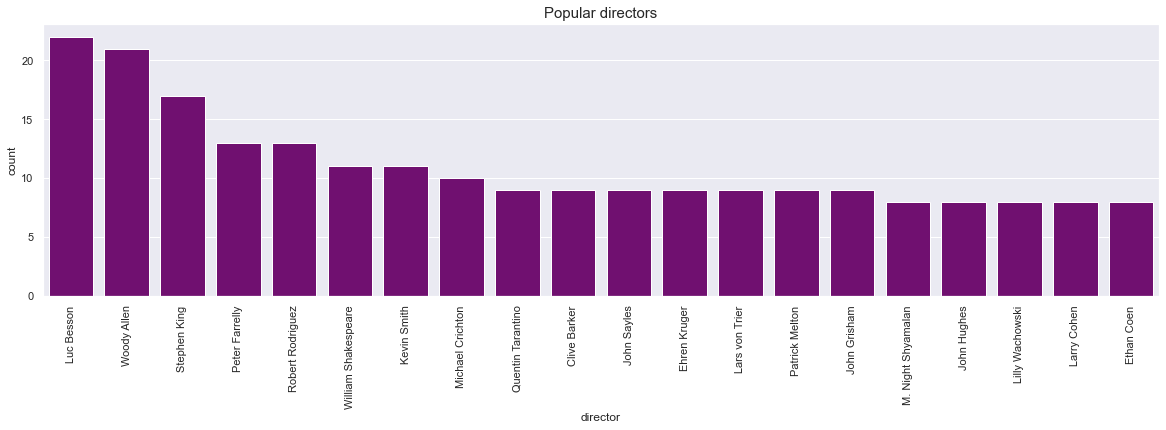

In [50]:
# Plot popular casts
plt.figure(figsize = (20,5))
directors=imdb['director'].explode()
ax=sns.countplot(x=directors, order = directors.value_counts().index[:20],color='purple')
ax.set_title('Popular directors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The above bar gaph shows a top-down list of director. **1. Luc Besson, 2. Woody Allen, 3. Stephen King, 4. Peter Farrelly, and 5. Robert Rodriguez**, repectively. The list goes on and on, but here we only gave the top 5.

### Director by genre

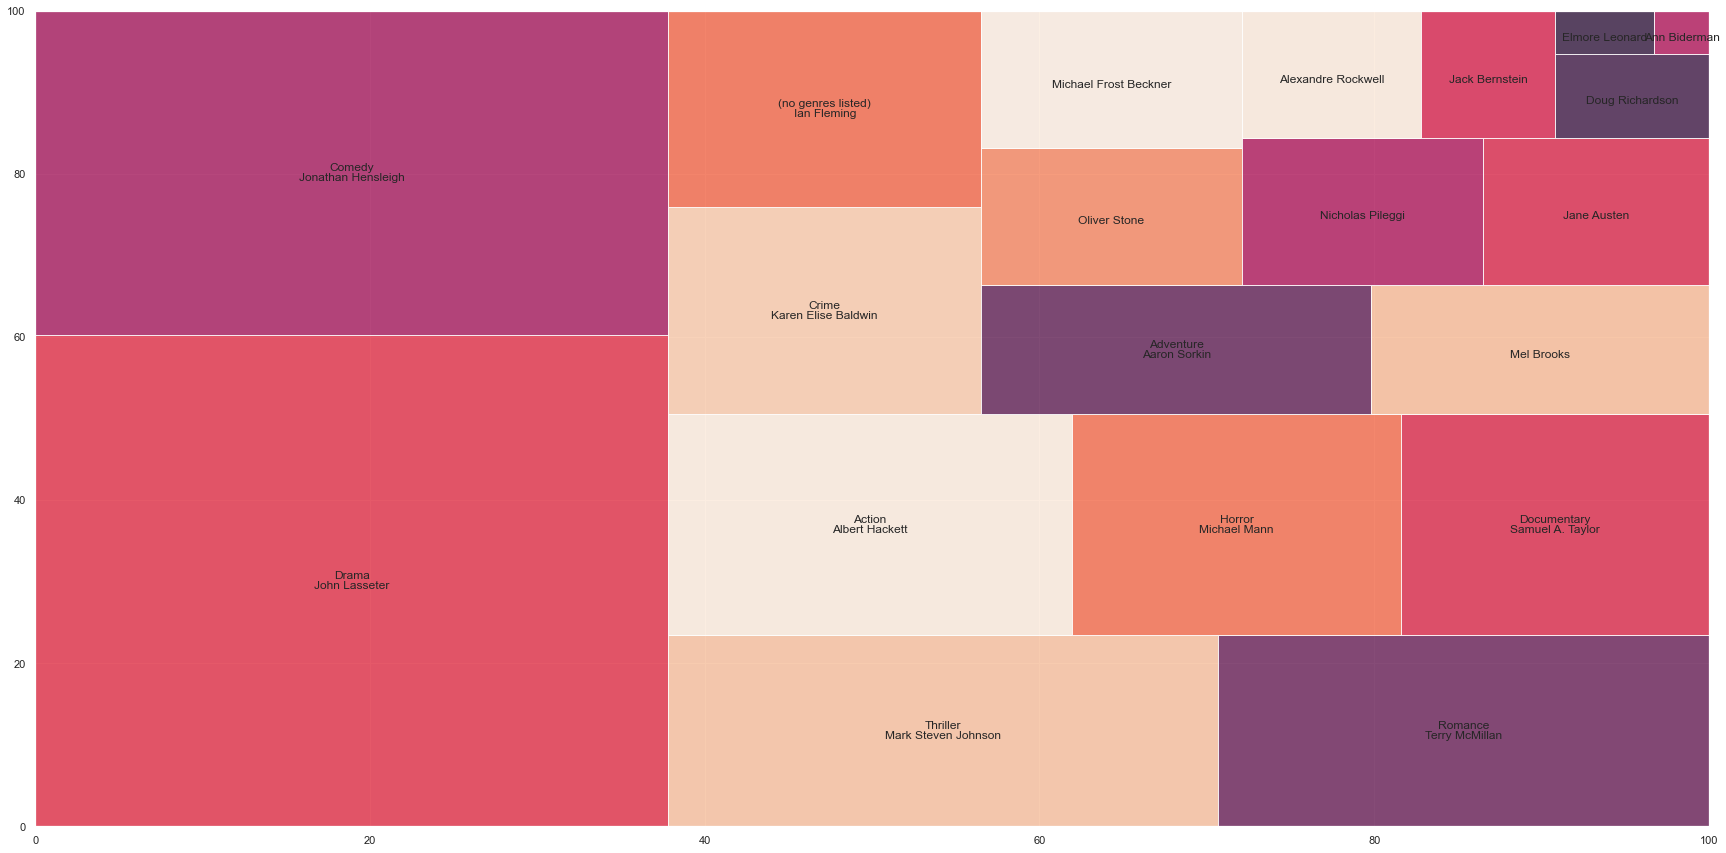

In [51]:
# GENRES BY COUNTRIES
import squarify

size = movies_genres['genres'].value_counts().tolist()
plt.figure(figsize=(30,15))
squarify.plot(value= directors, label= movies_genres['genres'].value_counts().index[:10], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

From the graph it can be seen that, Jonathan hensleigh was the director for comedy, John Lasseter for drama, and so on. So here if you know the kind of movie you interested in watching, you know who your go to director to search for.

### Top 30 Most used budget

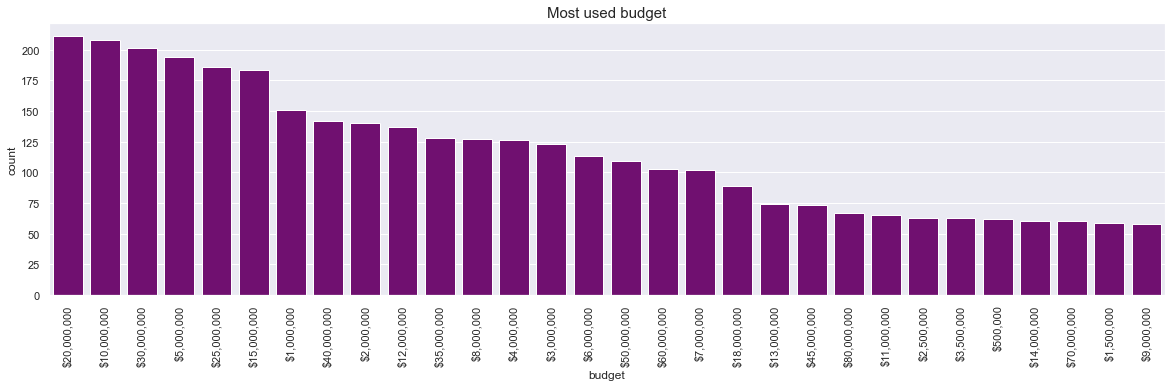

In [52]:
plt.figure(figsize = (20,5))
budget=imdb['budget'].explode()
ax=sns.countplot(x=budget, order = budget.value_counts().index[:30],color='purple')
ax.set_title('Most used budget',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Exploring the budget column is quite hectic since it has a lot of nulls, and the measurement unit is different. But It wouldn't hurt to see which budget was used the most for movies. 20 000 000 USD was used the most and was used for 200 movies  followed by a budget of 10 000 000 USD which was used for about 200 movies. the list goes on and on.

### 3.5 Genome score dataset eploration

In [53]:
genome_scores.head()

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

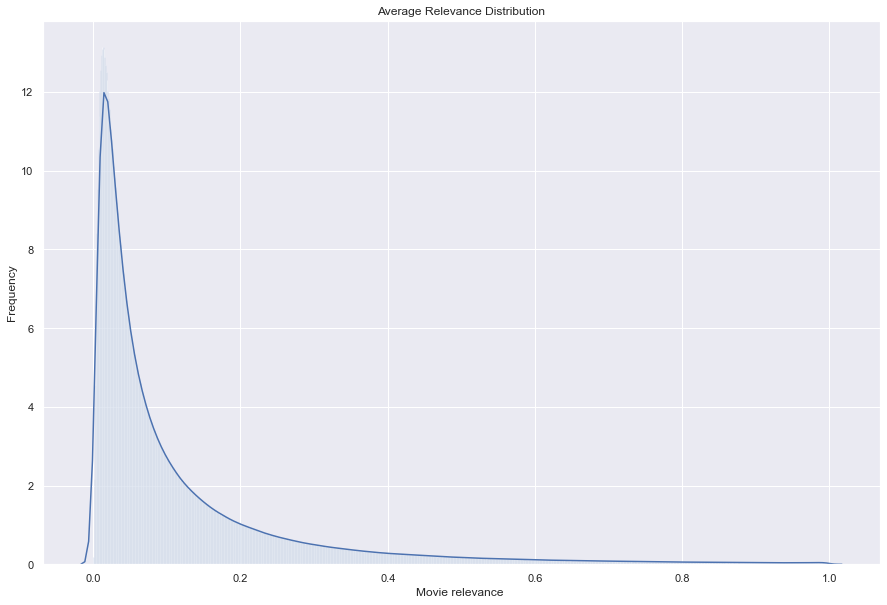

In [54]:
# Scatter Plot of avg Rating

plt.figure(figsize=(15,10))
ax= sns.distplot(genome_scores['relevance'], bins=1000)
plt.title("Average Relevance Distribution")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Movie relevance ', fontsize=12)

plt.show()

**Findings:** The movie relevance distribution is skewed to the right indicating a positive skewness. It indicates that there is a strong correlation between the tags and movie being watched. 

# 4. Data Prepartion

### Here you will sort your data out and process it accordingly

# 5. Modelling phase

## 5.1 Content-Based Filtering

In trying to achieve the ultimate user experience that keeps users coming back to use the product. The company needs to tailor the product to the user through a filtering process.A content-based recommender system strives to create the best user experience by tailoring the product to the user.This is done by using content based filtering methods,these methods utilise the desciption of the characteristics of the item such as the genre, category, tags etc.With all that theory in mind.The Content-Based Recommendation system that we built computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. The movies.csv dataset is used to build the recommender.We did not use the content-based filtering method to predict ratings as it is computational expensive.

In [56]:
moviesV = pd.read_csv('edsa-movie-recommendation-challenge/movies.csv')
moviesV.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [57]:
# Break up the big genre string into a string array
moviesV['genres'] = moviesV['genres'].str.split('|')
# Convert genres to string value
moviesV['genres'] = moviesV['genres'].fillna("").astype('str')

#create a sample of the movies genres  
sample_genre= moviesV['genres'].head(20000)
sample_genre.head()

0    ['Adventure', 'Animation', 'Children', 'Comedy...
1                 ['Adventure', 'Children', 'Fantasy']
2                                ['Comedy', 'Romance']
3                       ['Comedy', 'Drama', 'Romance']
4                                           ['Comedy']
Name: genres, dtype: object

### Vectorizing the content 

The content-based recommender system that we are developing makes use of the descriptions of the characteristics of the movie.These description are often qualitative.To utilise this vital information we vectorized the qualitative feature.We used the  **Term Frequency (TF)** and **Inverse Document Frequency (IDF)** which is commonly used as an  information retrieval systems and also content based filtering mechanisms (such as a content based recommender). The TF-IDF vectorizer is commonly used to determine the relative importance of a document / article / news item / movie etc.

This informed our decision of using the  TfidfVectorizer function from scikit-learn to transforms text to feature vectors that can be used as input to estimator.

In [58]:
#create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
genre_vec = tf.fit_transform(sample_genre)

### Finding the Similarities between movies

To find the similarities between two movies we made use of the **[Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html)** to calculate a numeric quantity that denotes the similarity between the two movies. We made use of sklearn's linear_kernel to generate the cosine similarities. 

In [59]:
cosine_sim = linear_kernel(genre_vec, genre_vec)

**Now that we have a consine similarity matrix for all the movies in the dataset.The next step was to write a function that returns the 10 most similar movies based on the consine similarity score.**

In [60]:
def genre_recommendations(movie_title):
    
    """
    Returns top 10 movie recommended movies based on movie title
    
    Parameter
    ---------
    movie_title(str): a string title of a movie.
    
    Return
    ------
    recommended_movies(str): list of recommeded movies.
    
    """
    # Build a 1-dimensional array with movie titles
    movie_index=pd.Series(moviesV.index,index=moviesV['title'])
    
    #generate  similarities between the movie title and movie index based on genre
    similarities=list(enumerate(cosine_sim[movie_index[movie_title]]))
    #generate the top 10 similarities
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:11]
    recommended_movies= moviesV['title'].iloc[[i[0] for i in similarities]]
    
    return recommended_movies

### Top 10 recommendations based on a movie title 

In [61]:
genre_recommendations('Shrek the Third (2007)')

2203                                           Antz (1998)
3021                                    Toy Story 2 (1999)
3653        Adventures of Rocky and Bullwinkle, The (2000)
3912                      Emperor's New Groove, The (2000)
4780                                 Monsters, Inc. (2001)
9949     DuckTales: The Movie - Treasure of the Lost La...
10773                                     Wild, The (2006)
11604                               Shrek the Third (2007)
12969                       Tale of Despereaux, The (2008)
17431    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

The recommender system gave decent recommendations for **Shrek the Third ** (Animation, Children's, Comedy). 

Overall some of the pros of using content-based recommendation is :

* No need for data on other users, thus no cold-start or sparsity problems.
* Can recommend to users with unique tastes.
* Can recommend new & unpopular items.
* Can provide explanations for recommended items by listing content-features that caused an item to be recommended (in this case, movie genres)

However some of the limitations are :

* It does not recommend items outside a user's content profile
* It is unable to exploit quality judgements of other users
* Consumers might have multiple interests

## 5.2 Collaborative-Based Filtering
Collaborative Filtering is the most common technique used when it comes to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected.

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

***Surprise:***

* Provides various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVDpp, NMF), and many others.
* Provides tools to evaluate, analyse and compare the algorithms’ performance.

From the Suprise library, the follwoing algorithms were used:

### Basic algorithms
***NormalPredictor:*** this algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal.

***BaselineOnly:*** this algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms
***KNNBasic:*** this is a basic collaborative filtering algorithm.

***KNNWithMeans:*** this is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

***KNNWithZScore:*** this is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

***KNNBaseline:*** is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms
***SVD:*** this algorithm is equivalent to Probabilistic Matrix Factorization ( which makes use of data provided by users with similar preferences to offer recommendations to a particular user).

***SVDpp:*** this algorithm is an extension of SVD that takes into account implicit ratings.

***NMF:*** this is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

***SlopeOne:*** this is a straightforward implementation of the SlopeOne algorithm.

***Coclustering:*** is a collaborative filtering algorithm based on co-clustering.


In [62]:
#Loading 10000 dataset
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(10000), Reader)

In [63]:
#Implement an algorithm
algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

#Read 10000 dataset
data2 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(10000), Reader())

#Implementing algorithm for RMSE
algo_rmse=[]
for a in algo:
    
    cross_valid=cross_validate(a, data2, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


test_rmse  fit_time  test_time
Algorithm                                      
SVDpp             1.044800  0.453117   0.016290
SVD               1.046151  0.313487   0.012965
KNNBaseline       1.047708  0.538593   0.015968
BaselineOnly      1.047775  0.016603   0.012645
KNNBasic          1.077171  0.553518   0.018091
KNNWithMeans      1.101746  0.597769   0.016623
SlopeOne          1.101765  0.159240   0.014960
NMF               1.103414  0.768739   0.016288
KNNWithZScore     1.103829  0.727310   0.021844
CoClustering      1.111047  0.591054   0.011304
NormalPredictor   1.466296  0.005984   0.018617

Based on the table above containing test_rmse, fit_time, test_time values for the algorithms, we notice that the **SVDpp, SVD and BaselineOnly algorithms** are top three best performing algorithms. So we use the best performing top three for prediction and to find the Root Mean Squared Error (RMSE) values.

#### Predicting with SVDpp algorithm

In [64]:
#Loading 200000 dataset
data4 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(200000), Reader())

trainset, testset = train_test_split(data4, test_size=0.05)

In [65]:
from surprise import accuracy
#SVDpp model
svdpp=SVDpp(n_epochs = 30, n_factors = 100, init_std_dev = 0.05, random_state=42)

#Fitting the model
svdpp.fit(trainset)

# Making prediction on the validation dataset
test_pred= svdpp.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9524


In [66]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svdpp.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

ID       est
0  1_2011  3.464576
1  1_4144  4.120149
2  1_5767  3.497704
3  1_6711  3.743073
4  1_7318  3.248334

In [67]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVDpp.csv", index=False)

#### Predicting with BaselineOnly algorithm

In [68]:
#Loading 1100000 dataset
data5 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], Reader()) 

trainset, testset = train_test_split(data5, test_size=0.05)

from surprise import accuracy
#BaselineOnly model
bsl_options = {'method': 'sgd','n_epochs': 40}
blo=BaselineOnly(bsl_options=bsl_options)

#Fitting the model
blo.fit(trainset)

# Making prediction on the validation dataset
test_pred= blo.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

Estimating biases using sgd...
RMSE: 0.8674


In [69]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=blo.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

ID       est
0  1_2011  3.380427
1  1_4144  4.107184
2  1_5767  3.545160
3  1_6711  3.753824
4  1_7318  3.101245

In [70]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("blo2.csv", index=False)

#### Predicting with SVD algorithm

In [71]:
#Loading 1000000 dataset
data3 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], Reader())

trainset, testset = train_test_split(data3, test_size=0.05)

In [72]:
from surprise import accuracy
#SVD model
svd=SVD(n_epochs = 22, n_factors = 400, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.8083


In [73]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

ID       est
0  1_2011  3.450448
1  1_4144  4.109638
2  1_5767  3.671143
3  1_6711  4.081871
4  1_7318  3.266818

# 6. Conclusion

Machine Learning is a technique of training machines to perform the activities a human brain can do, albeit bit faster and better than an average human-being. 

Dealing with a large dataset has afforded us the opportuninty to gather insights that could be used to better understand our User's behaviour and allowed us to dig deeper in understanding how different features can be used to maximise consumer exprience, with the aid of algorithms such as Kmeans and Hierarchical clustering we were able to segregate groups with similar traits and assign them into clusters.

***Content_based_filtering***
We were able to use a mathematical approach that capitalizes on the simalarity features of a user based on their historical preference to make recommendation of movies that they are most likely to be interested in watching and this can be used to drive traffic as well as monitor traffic of the app.

***Colaborative Filtering***
After carefully training and cross-validating a number of algorithms using features that our users interaction with the features such as ratings we obsevered that SVD wich uses the probability that a user is mostly to take interest a certain product/services if they have interacted with that product/service such as rating a simalar product previously, we noticed that SVD did a better job at assigning probalities of recommend an accurate movie to a certain user using the users rating information.

# 7. Save pickle file for the model

In [74]:
import pickle

def save_model(model, filename: str = 'model.pkl'):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [75]:
save_model(svd)

# 8. Kaggle submission

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [76]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD2.csv", index=False)

In [77]:
#experiment.end()

In [78]:
#experiment.display()